In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sm, md, lg = 13, 15, 20 
plt.rc('font', size=sm)
plt.rc('axes', labelsize=sm)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [3]:
boys = pd.read_csv('schools-with-boys-toilet-2013-2016.csv')
girls = pd.read_csv('schools-with-girls-toilet-2013-2016.csv')

In [4]:
len(boys.State_UT.unique()) , len(girls.State_UT.unique())

(37, 37)

In [5]:
# Have a look of the Dataset
boys.head(2)


,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.0,100.0,100.0,100.0,0.0,0.0,100.0,0.0,100.00


In [6]:
boys_melted = pd.melt(boys, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melted = pd.melt(girls, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [7]:
boys_melted.head(3)

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
1,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00
2,Andaman & Nicobar Islands,2015-16,Primary_Only,100.00


In [8]:
categ = boys.columns.to_list()[2:] # All student category type in a list

## Toilet Facilities for Boys in all Student Category

### Boys

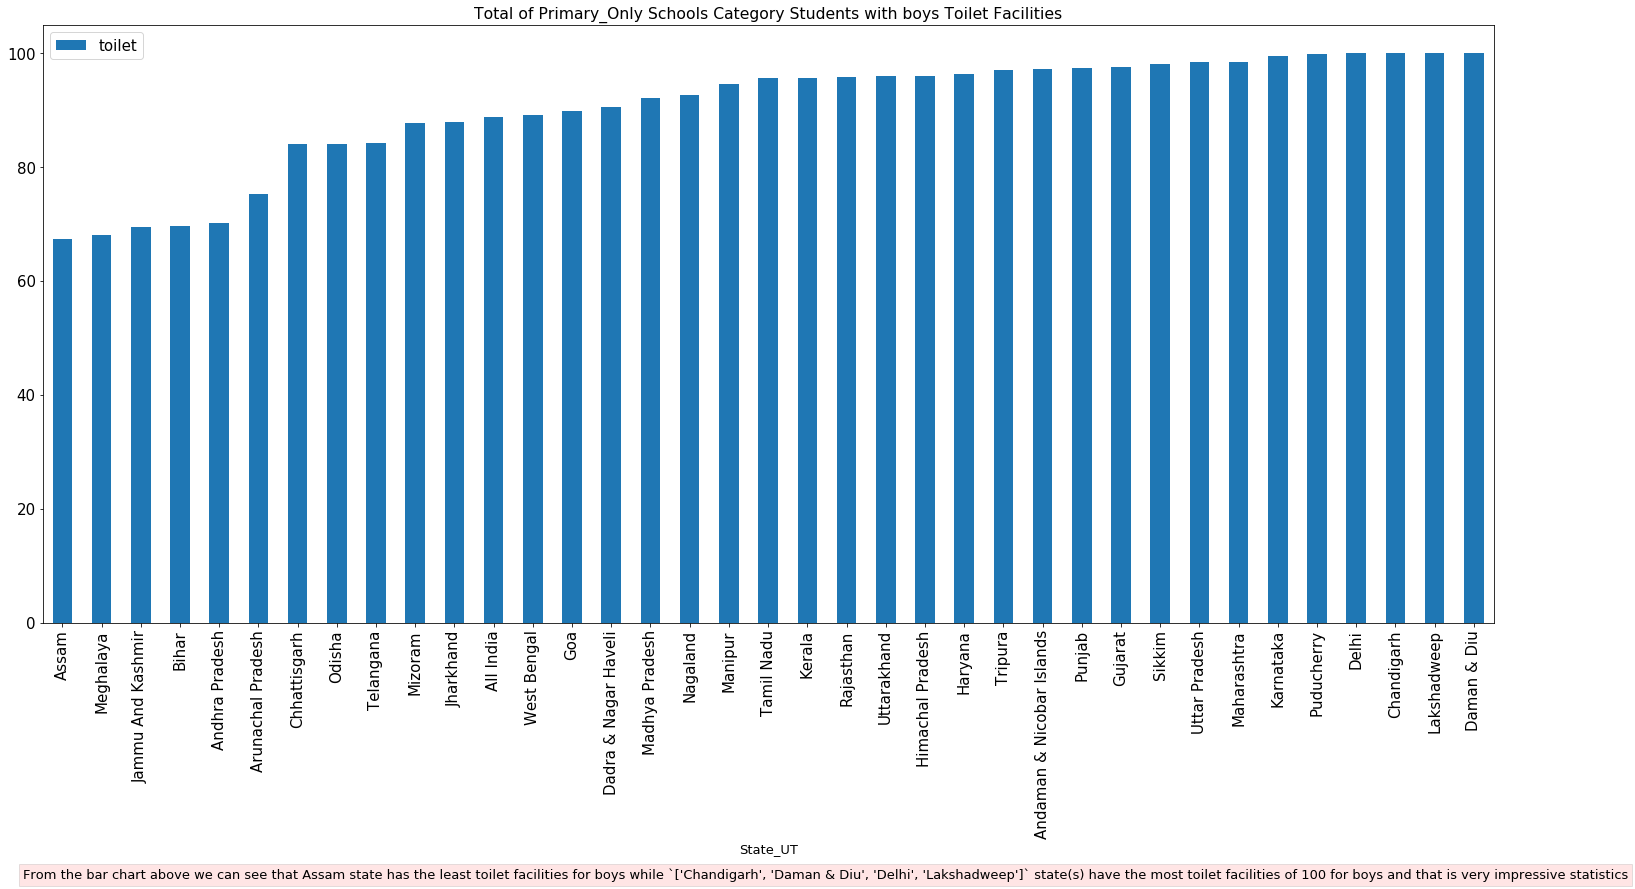

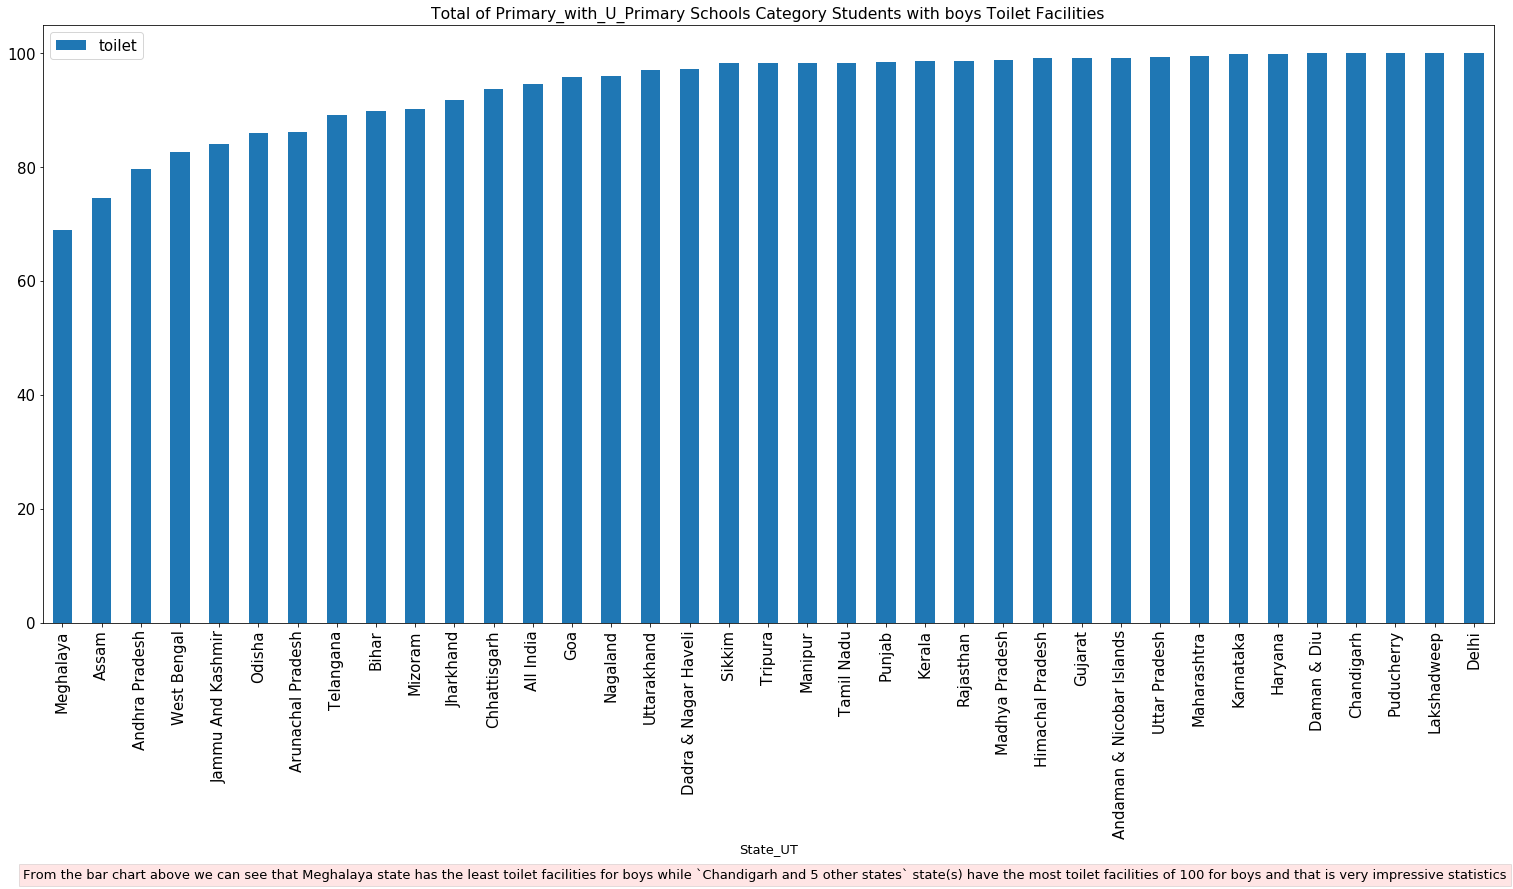

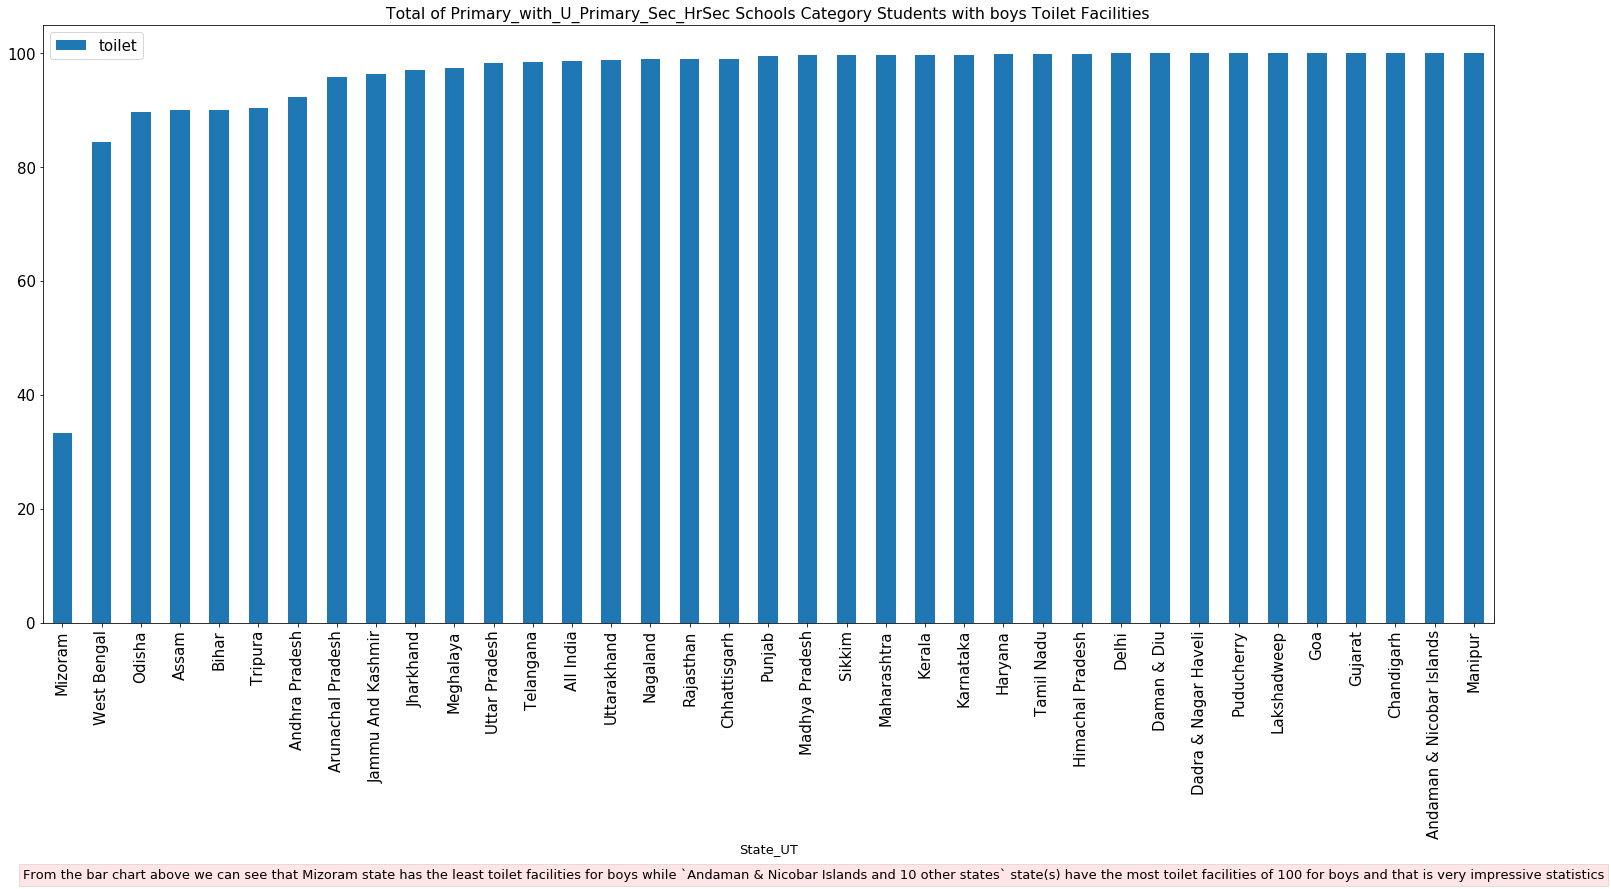

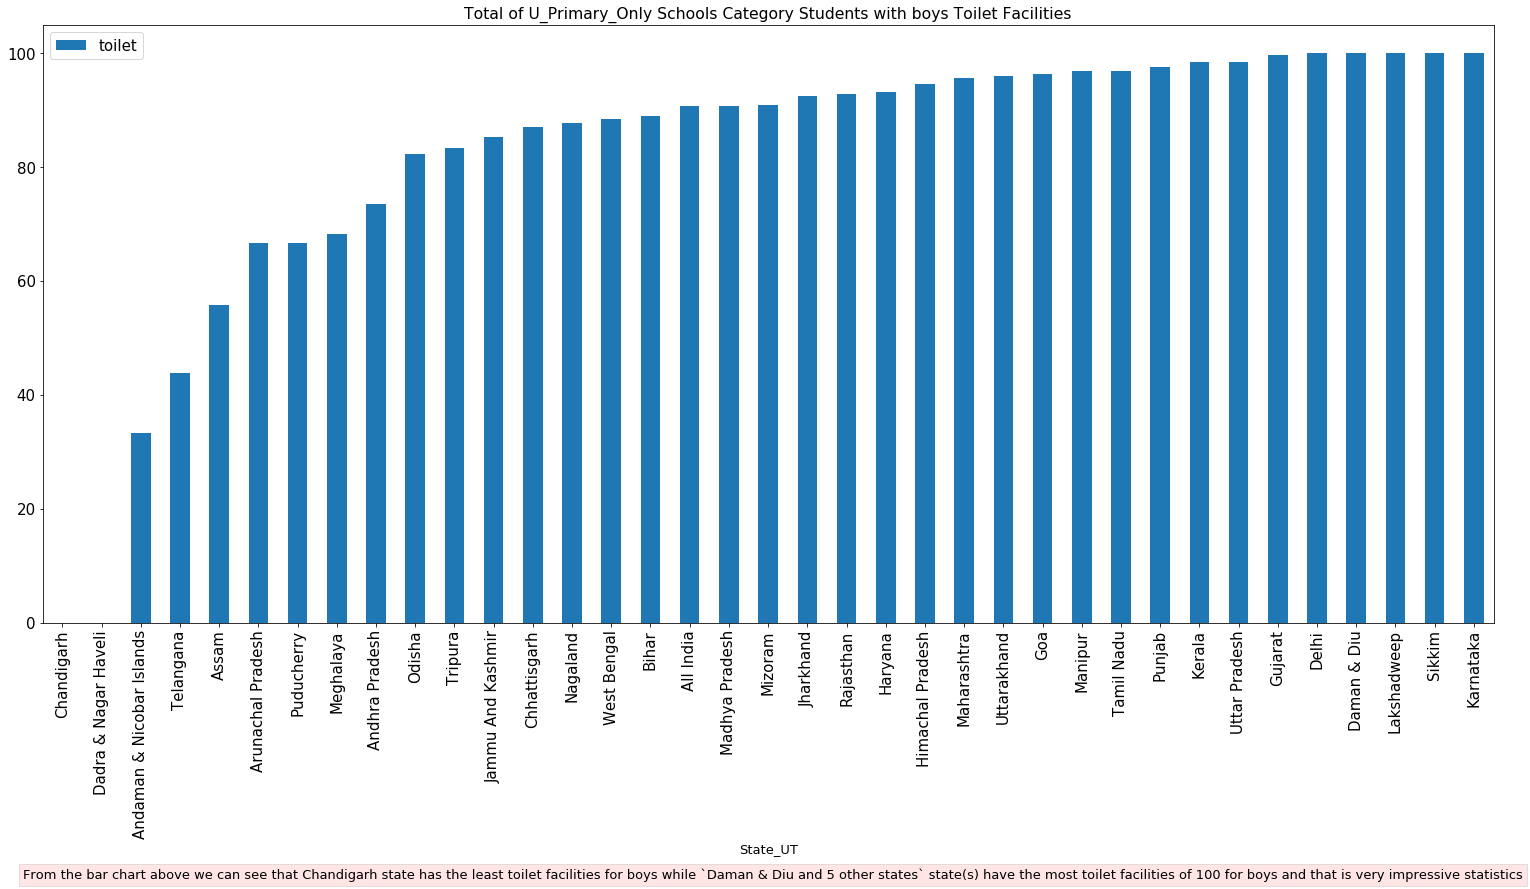

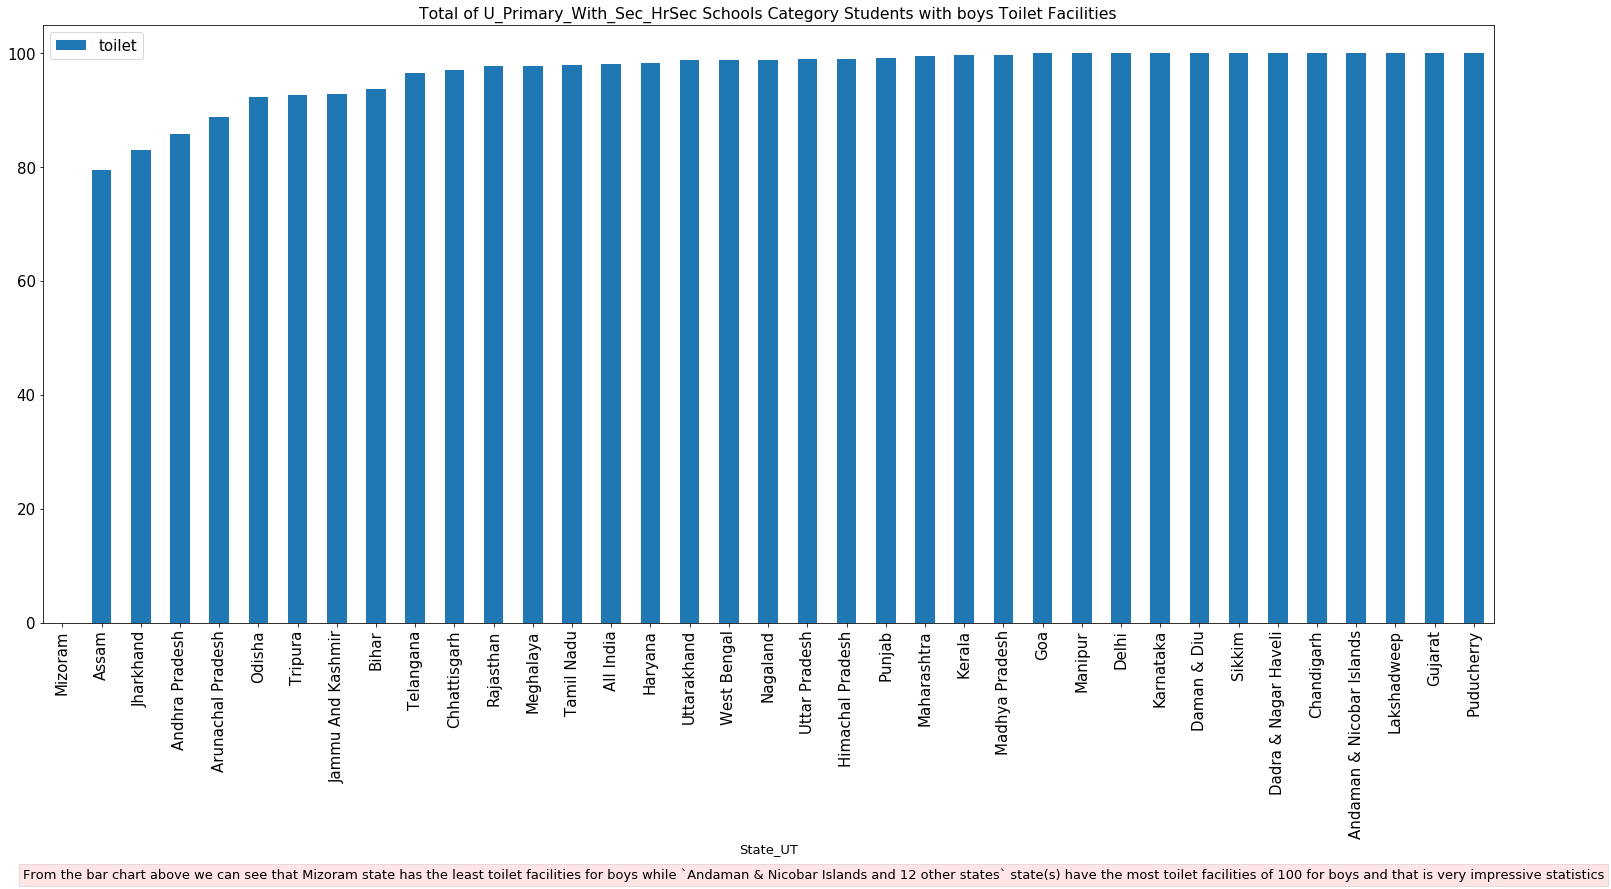

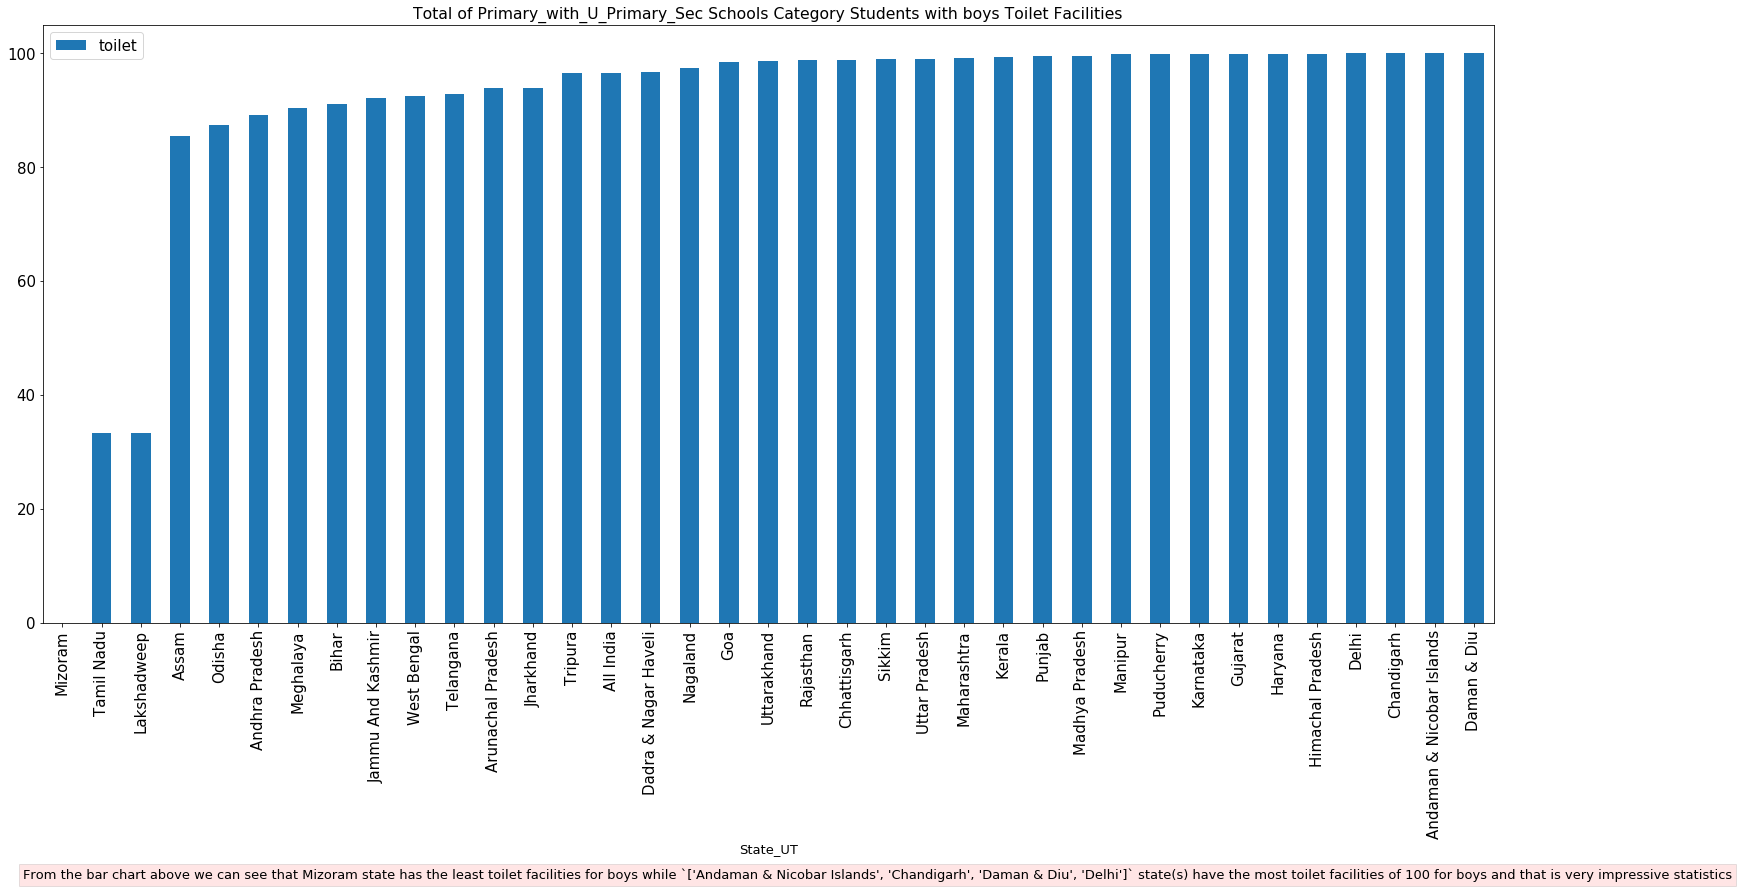

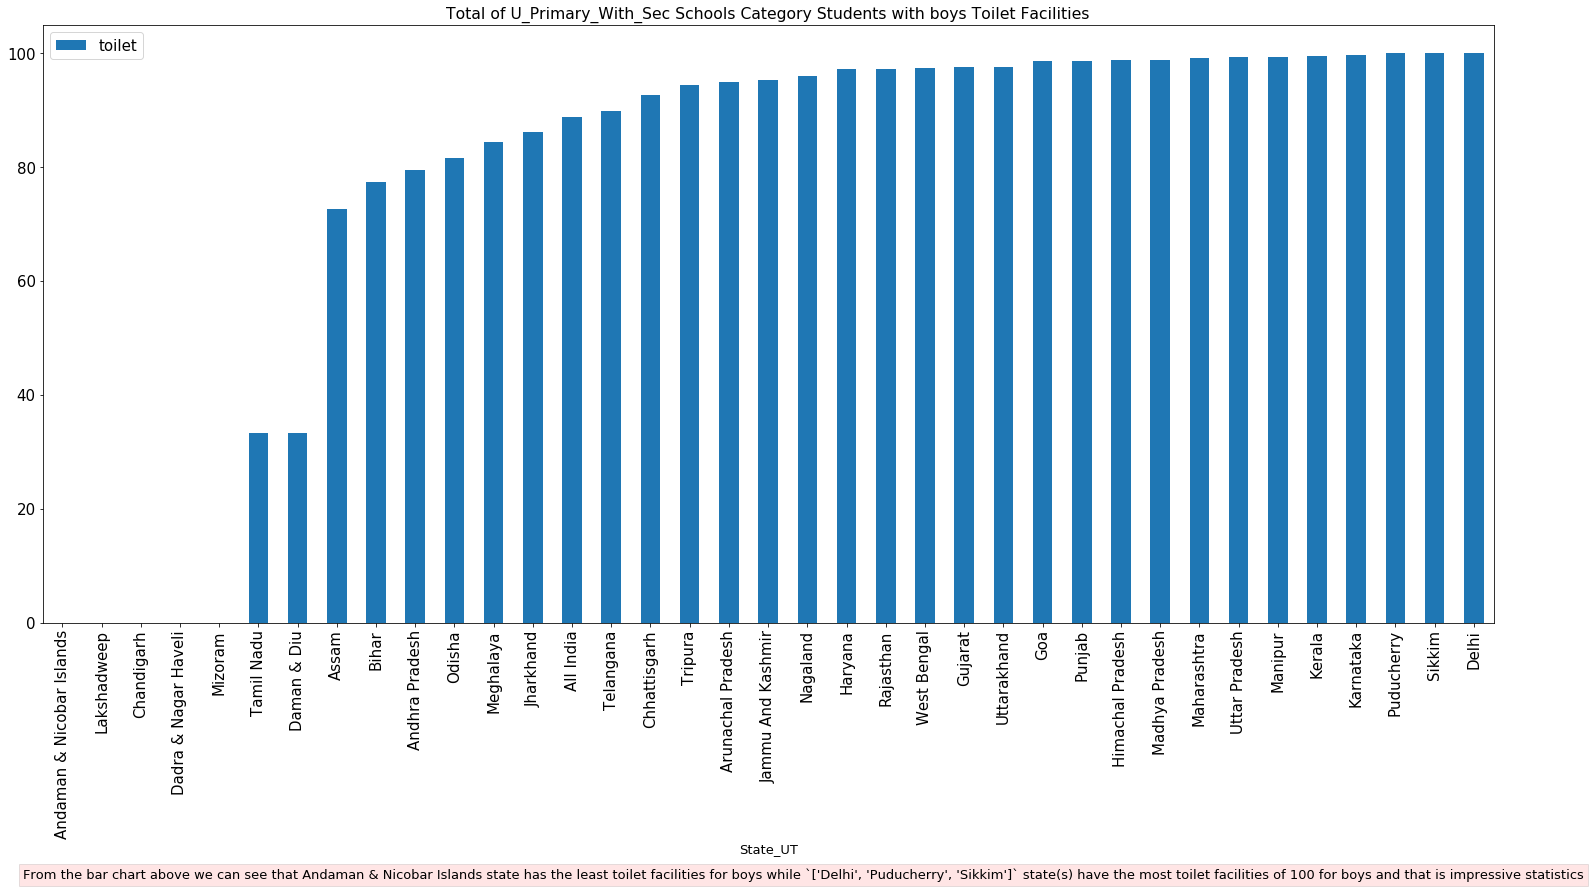

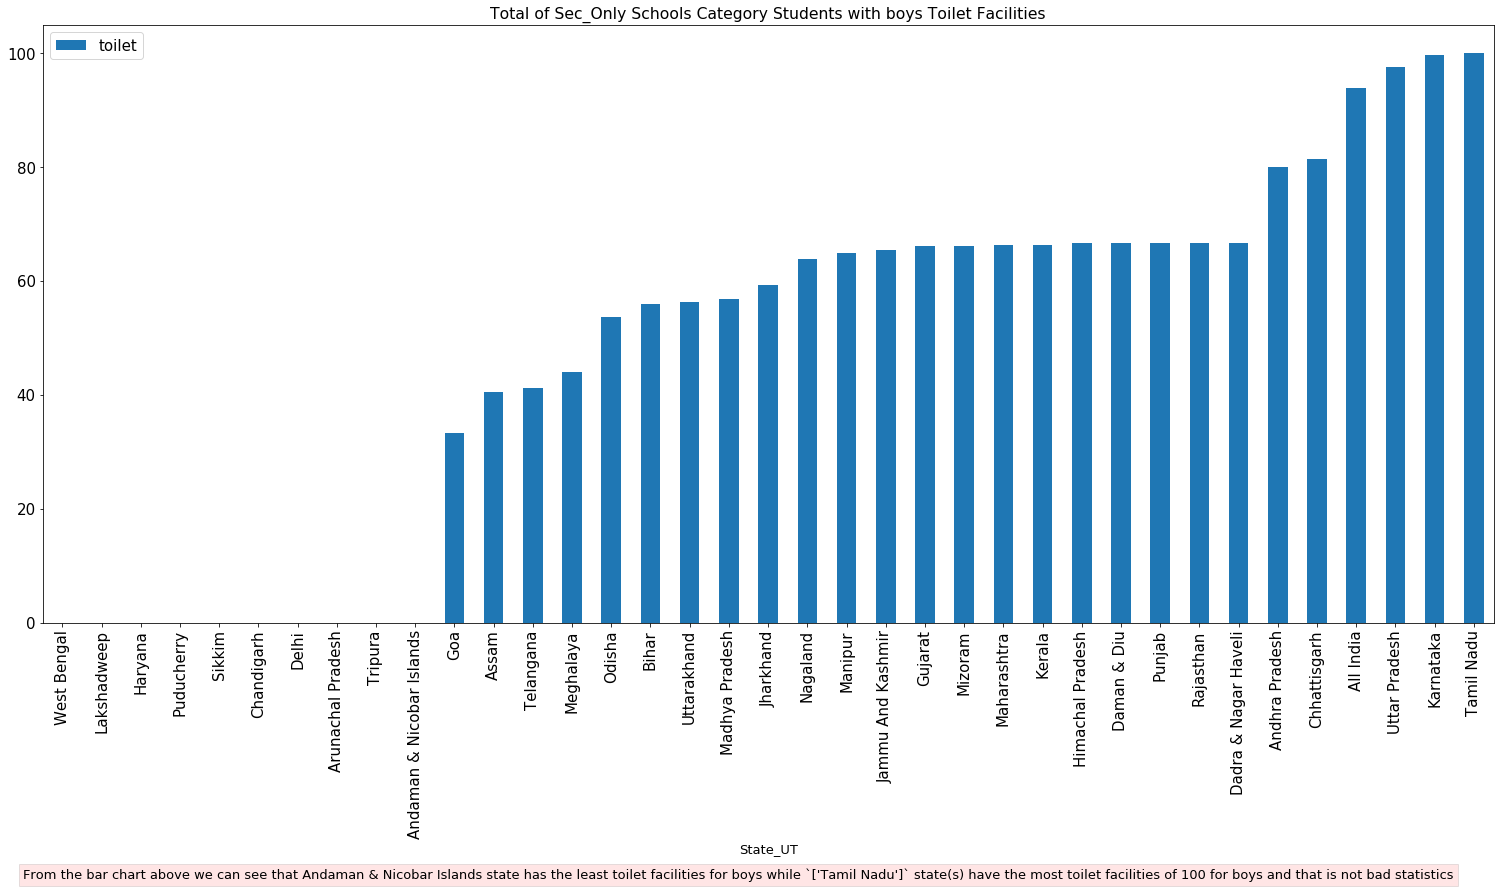

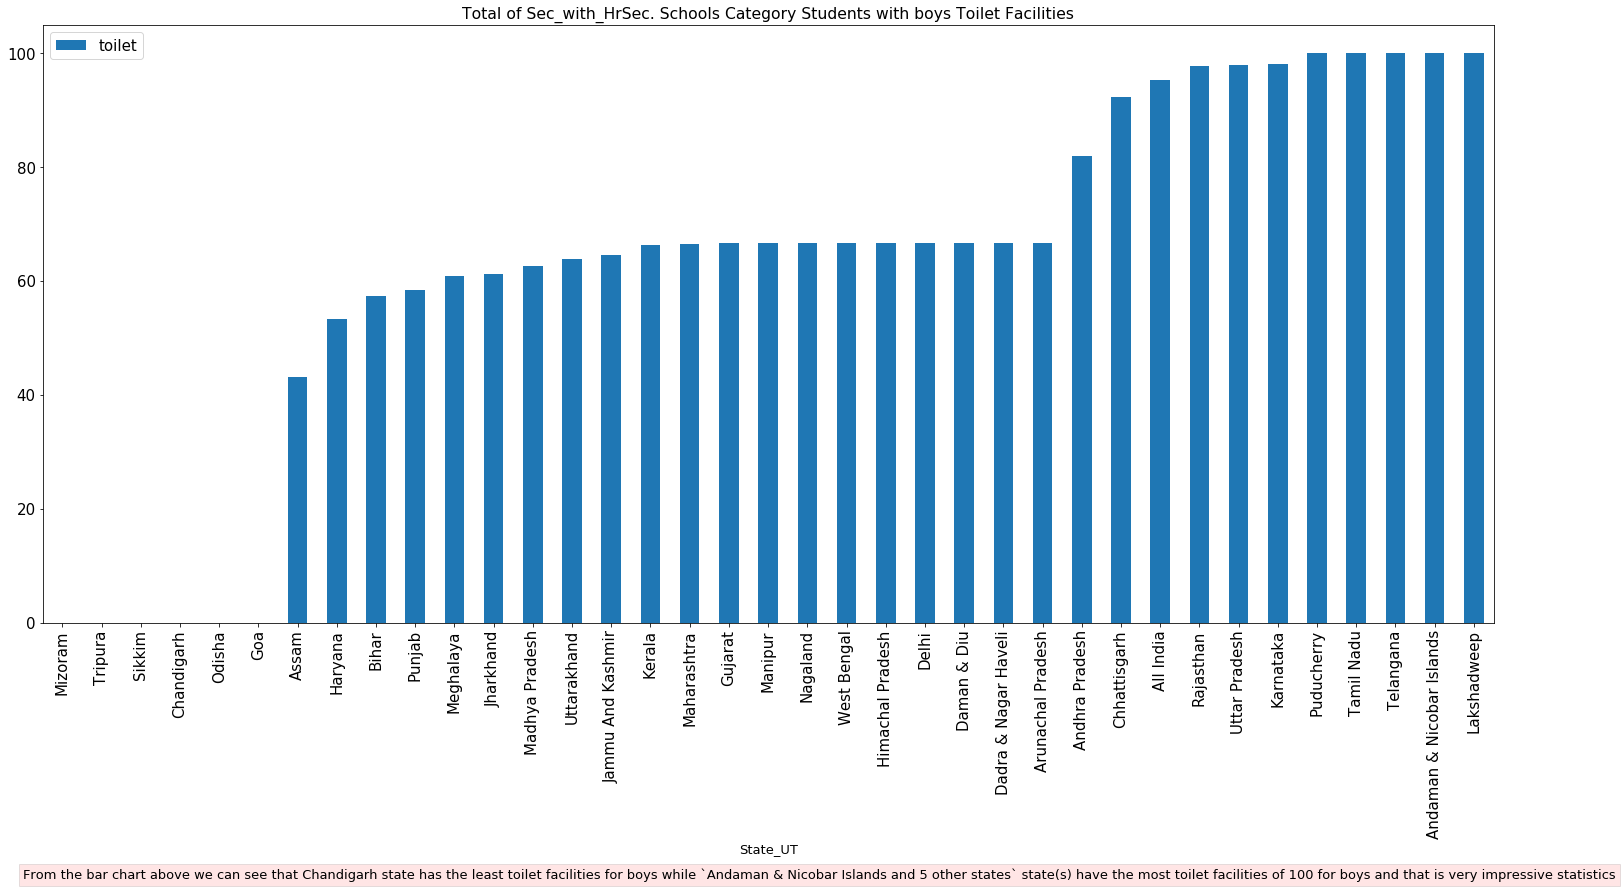

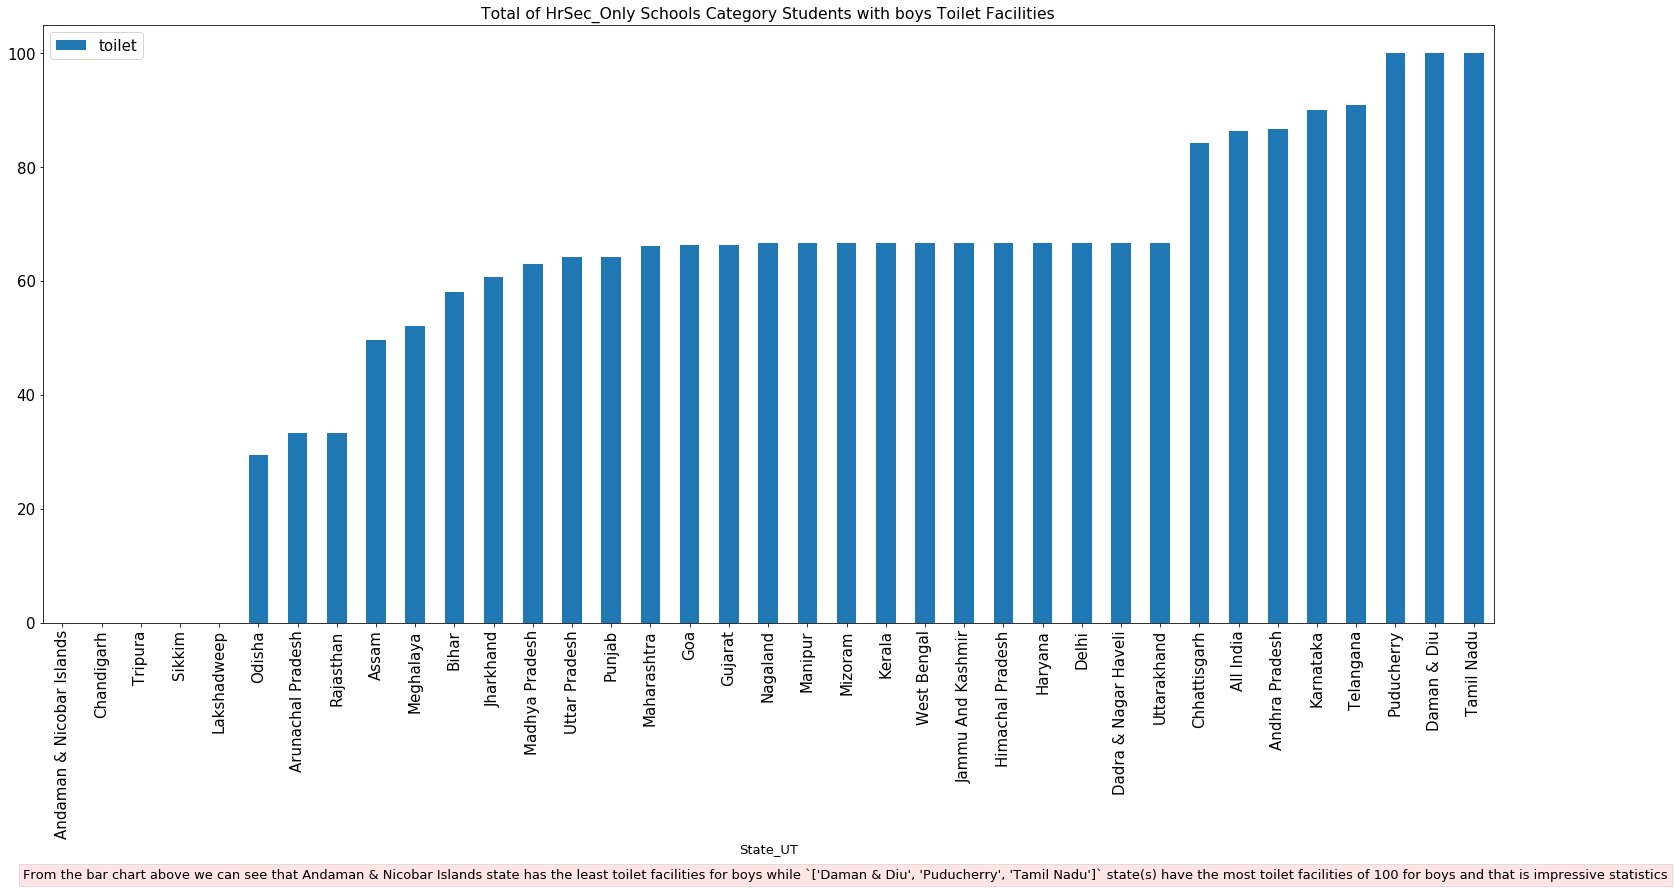

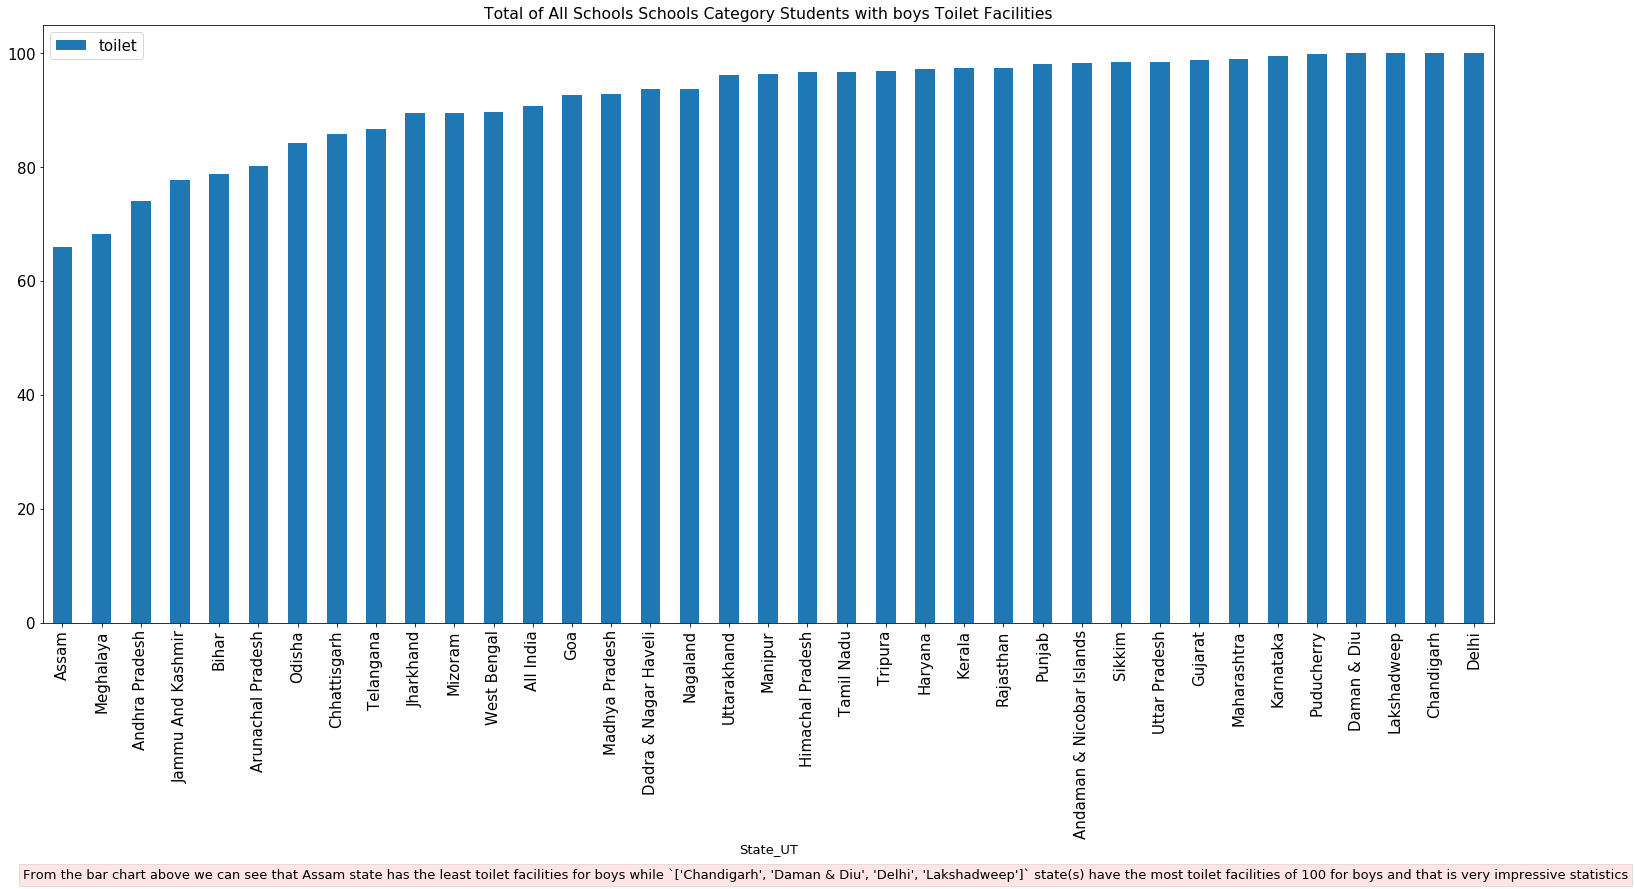

In [9]:
for category in categ:
    tmp_boys = boys_melted[boys_melted['School_Level'] == category]
    mean_tmp_boys = tmp_boys.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_boys.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with boys Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_boys.iloc[np.where(mean_tmp_boys['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_boys.iloc[mean_tmp_boys.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest)) # In the case when we have to many states that have 100 toilet facilities and can't display all
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for boys while `{}` state(s) have the most toilet facilities of 100 for boys and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))


## Toilet Facilities for girls in all Student category type 

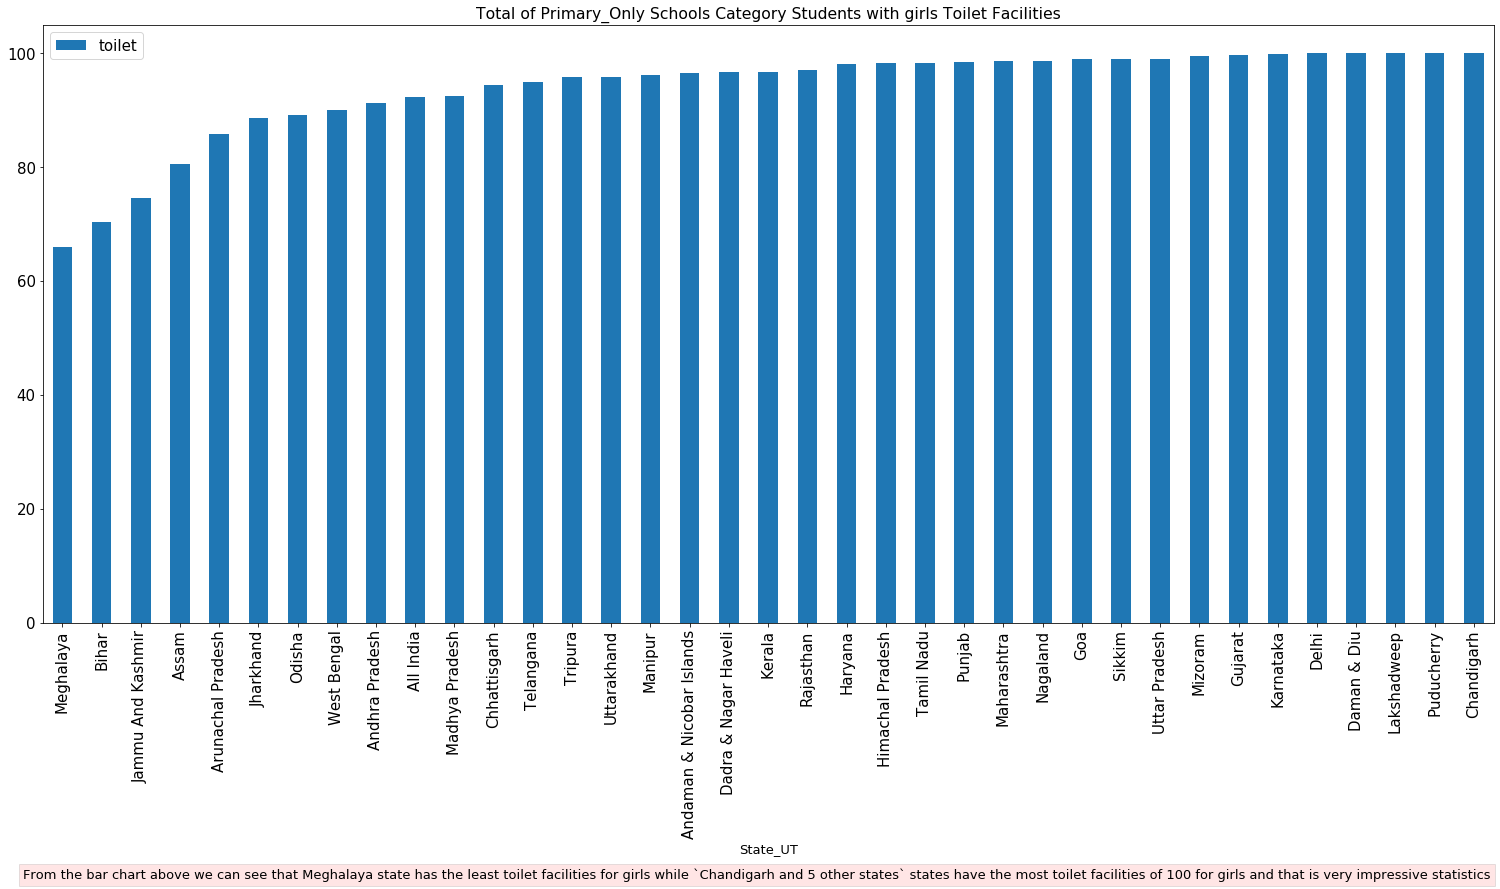

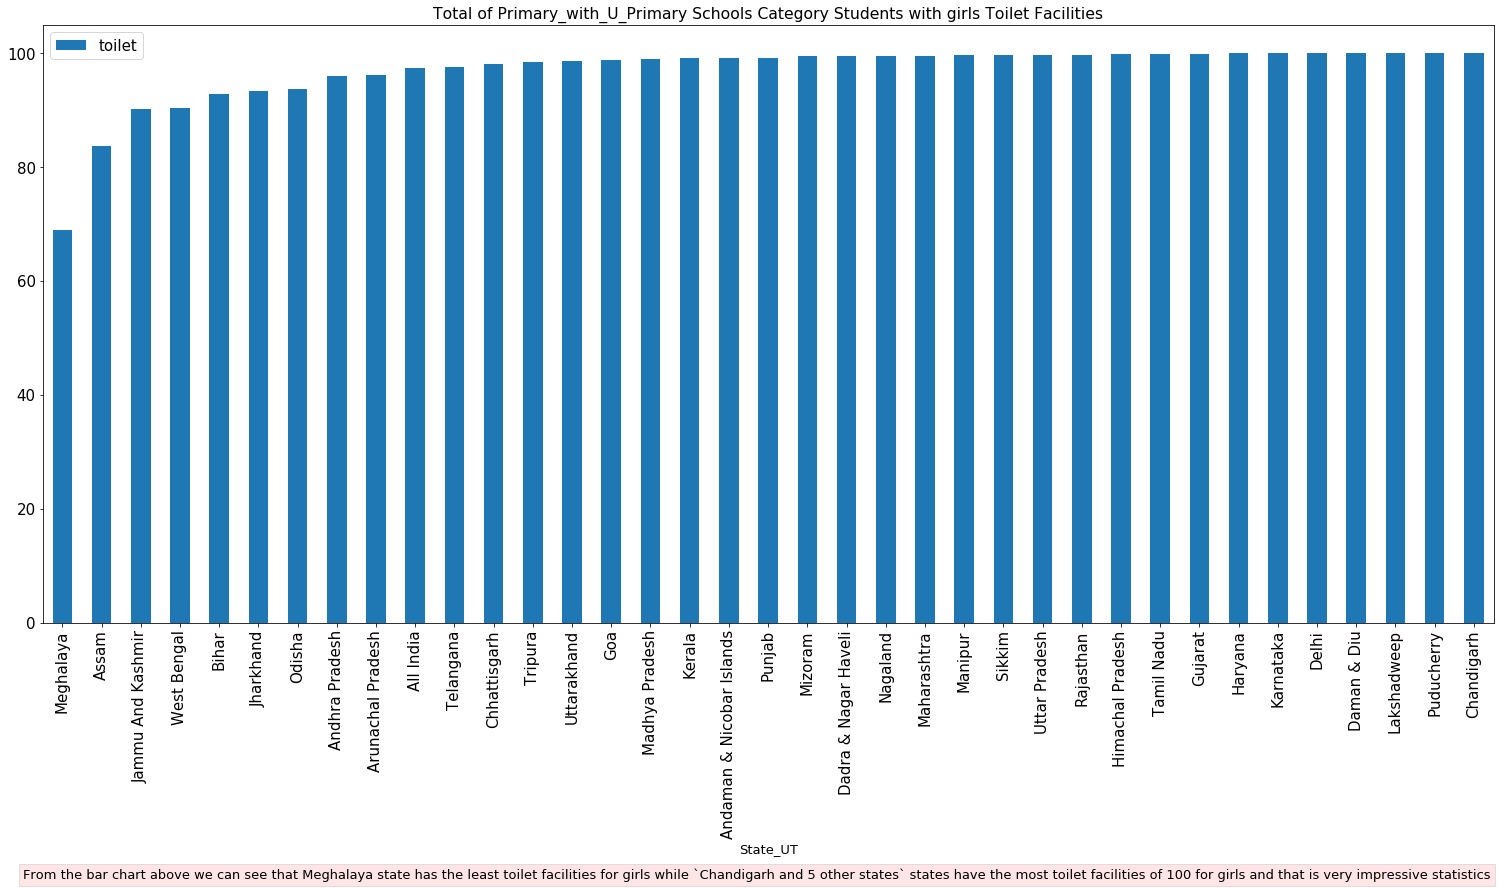

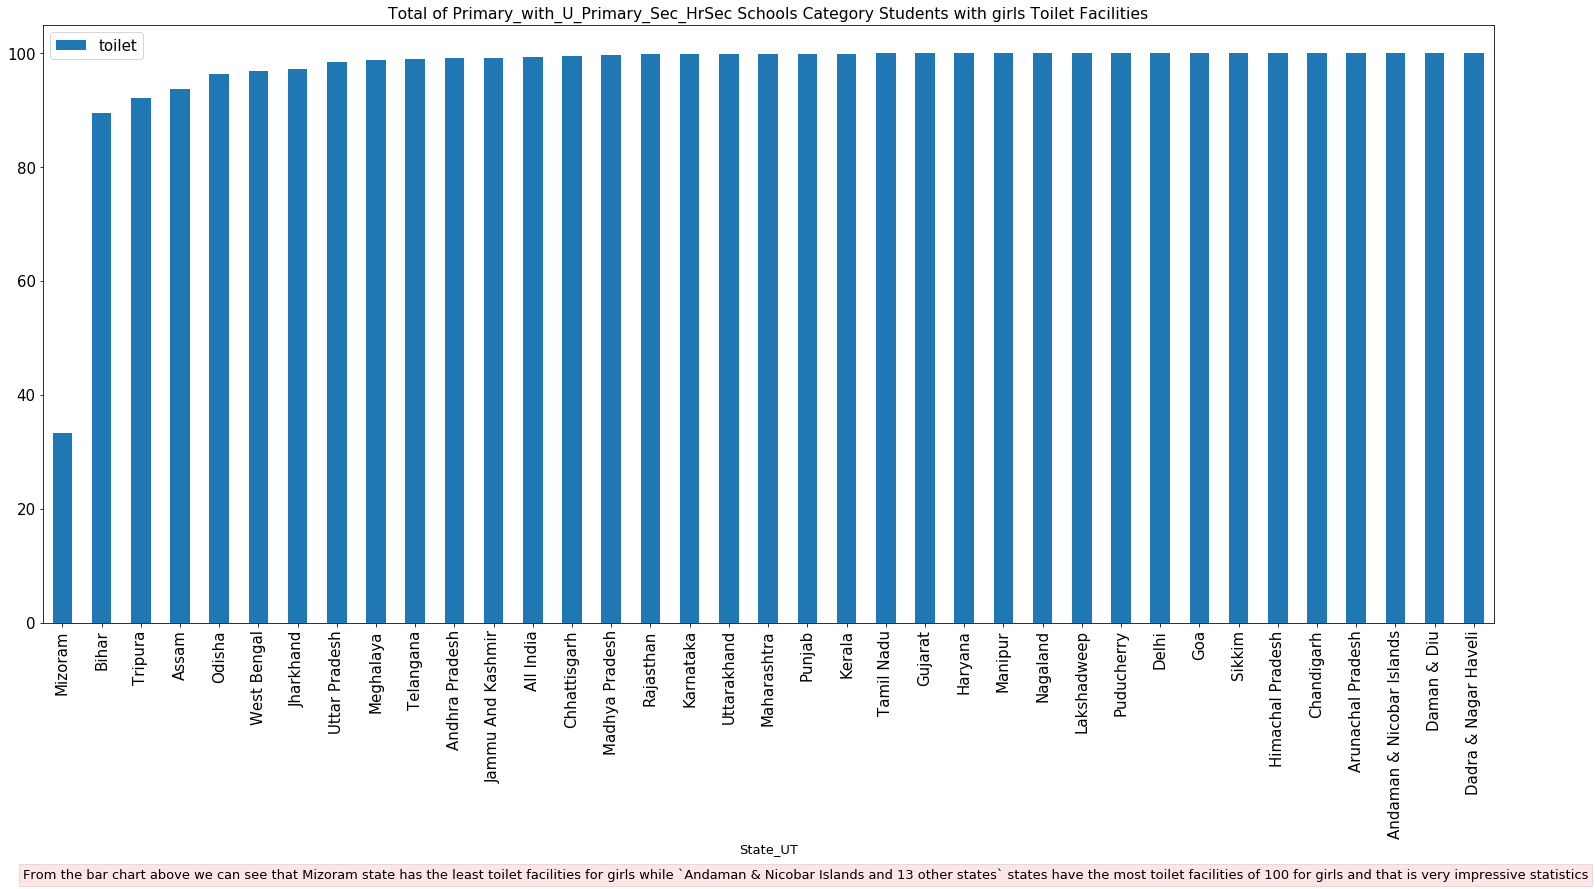

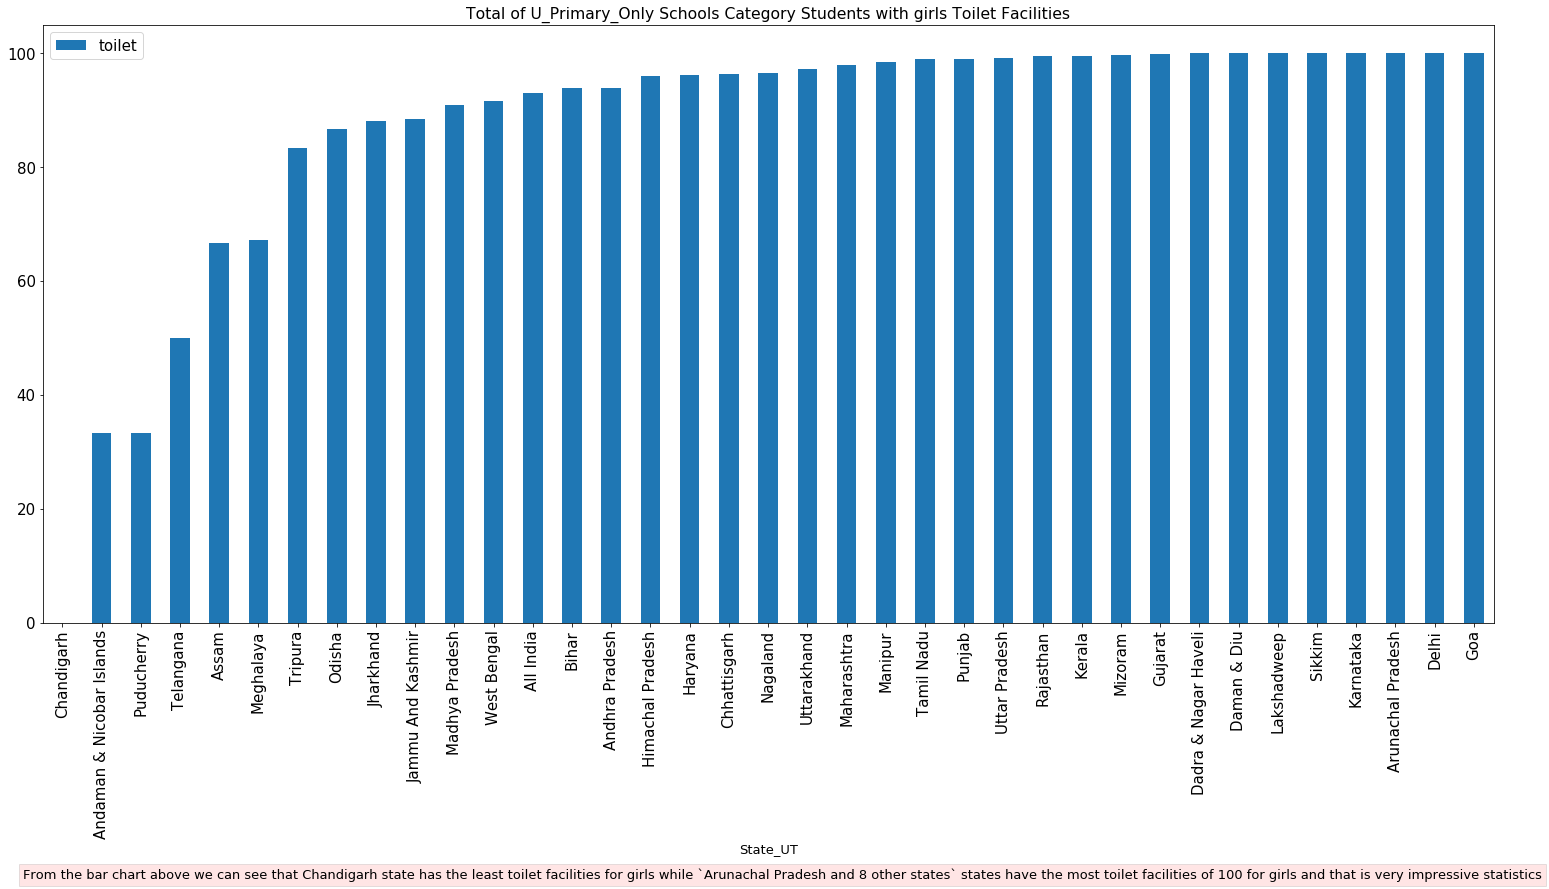

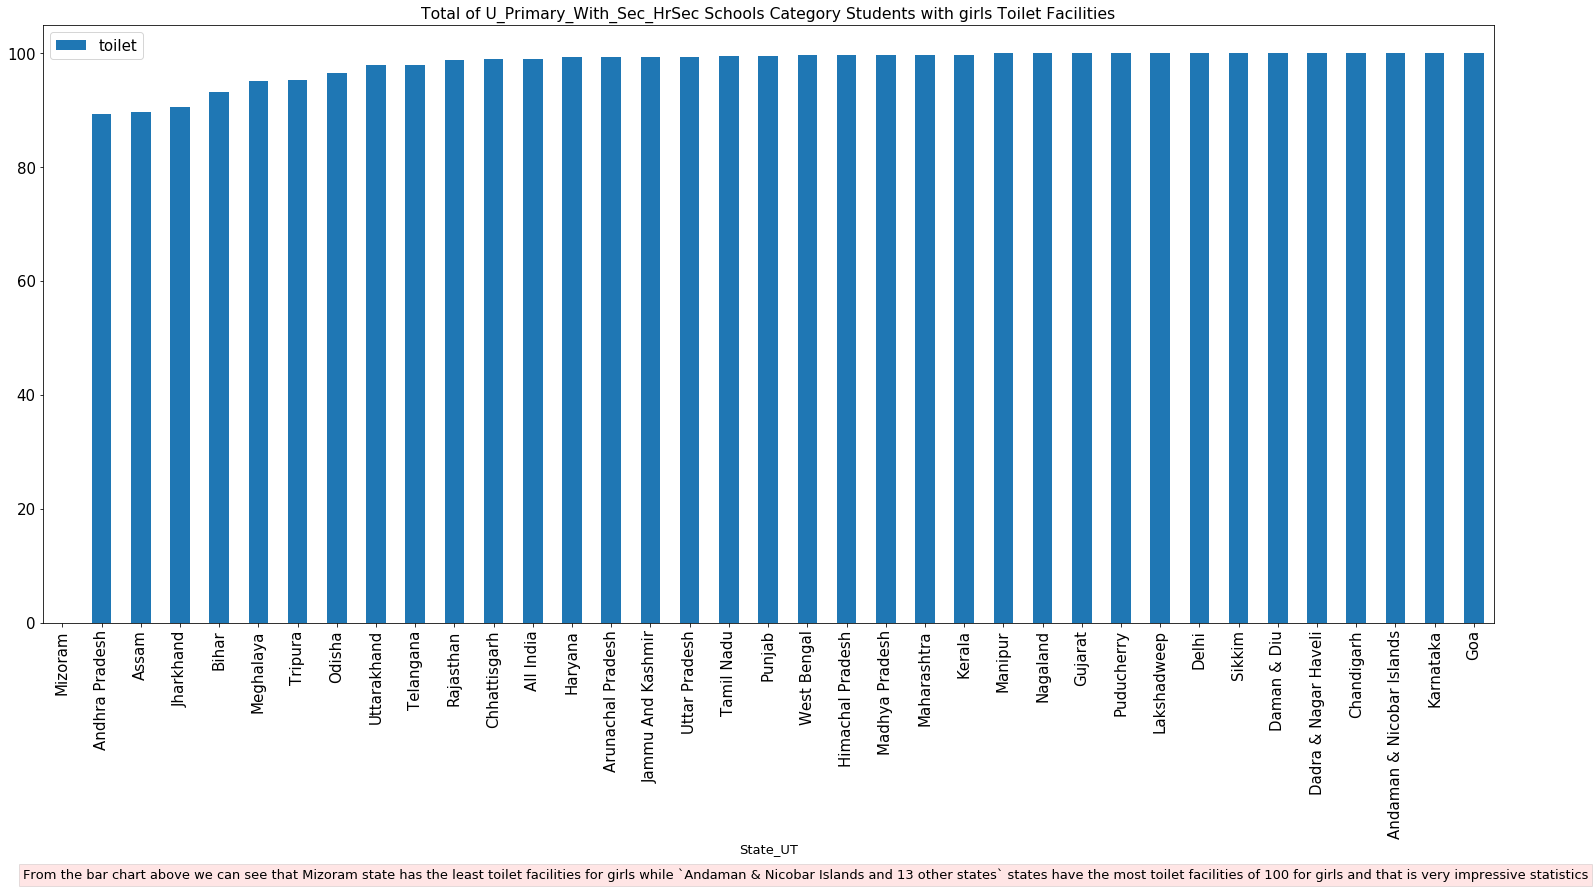

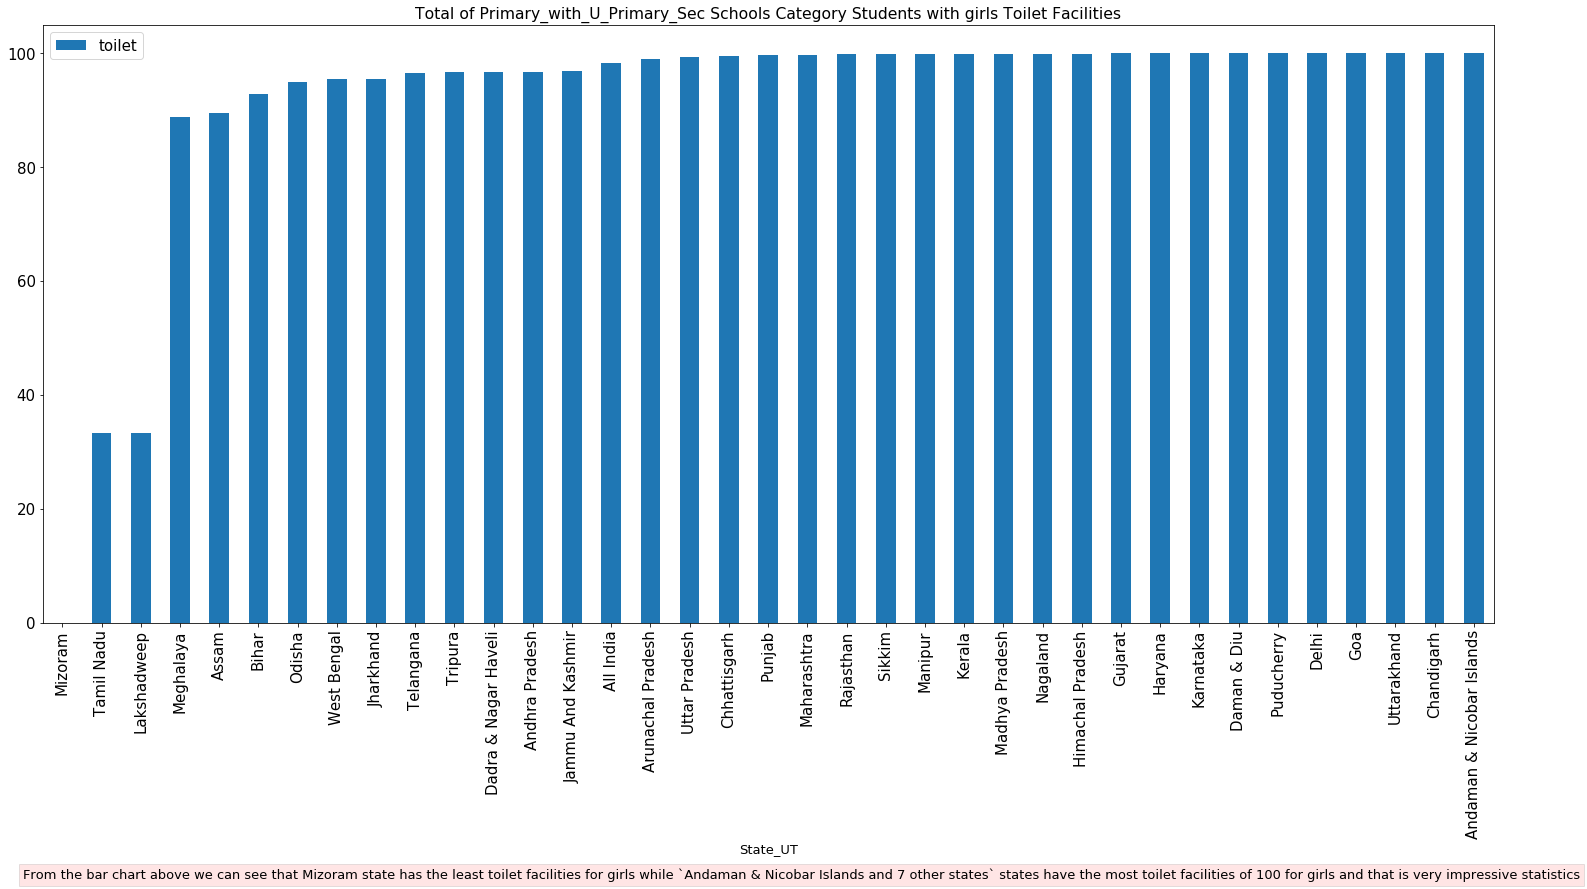

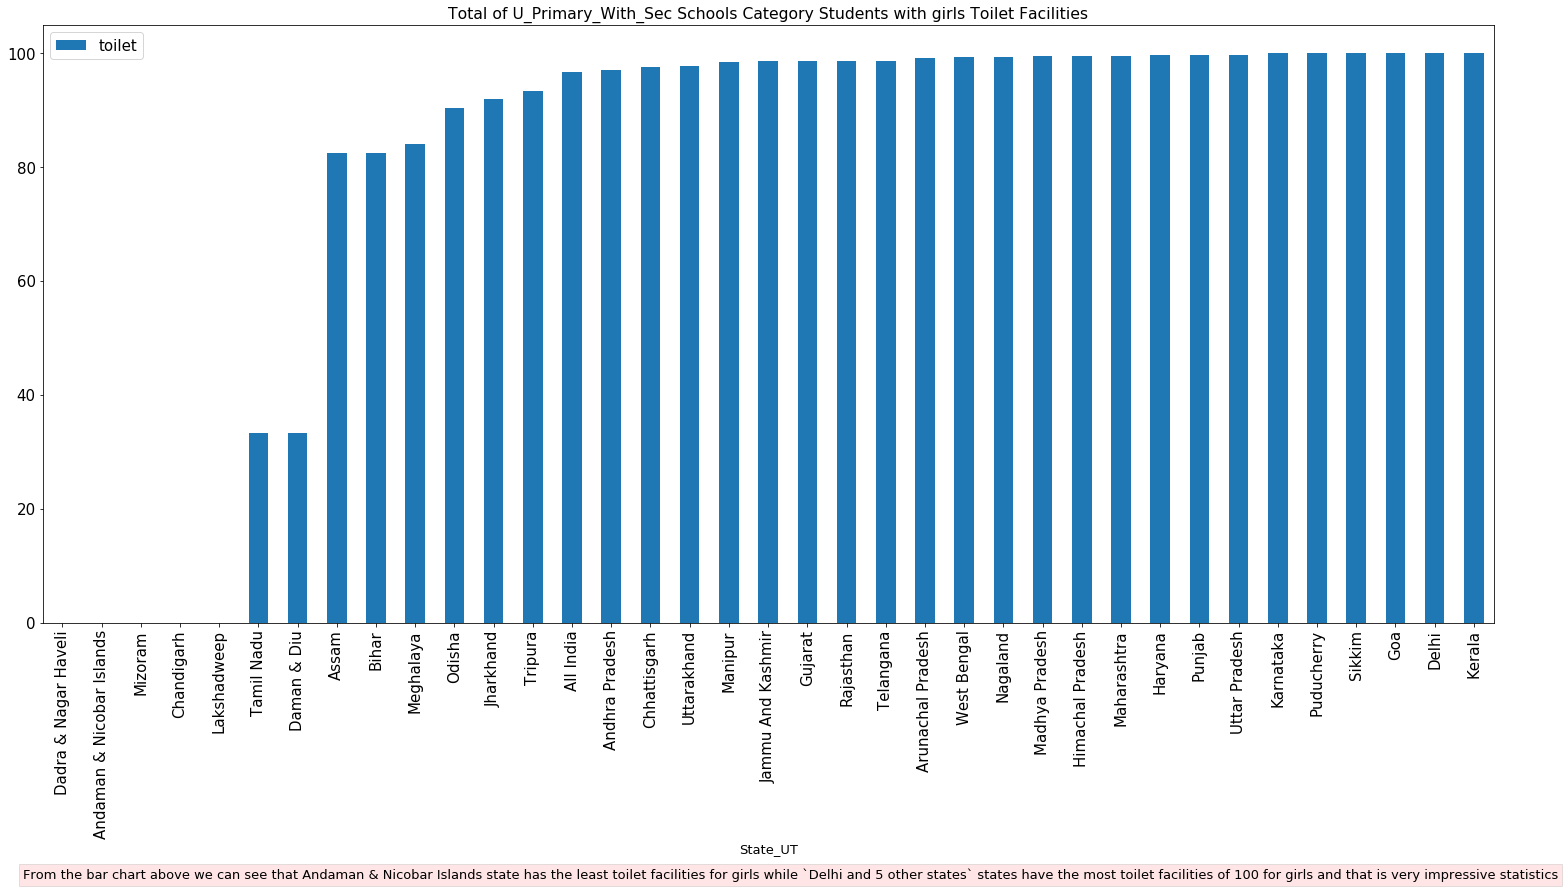

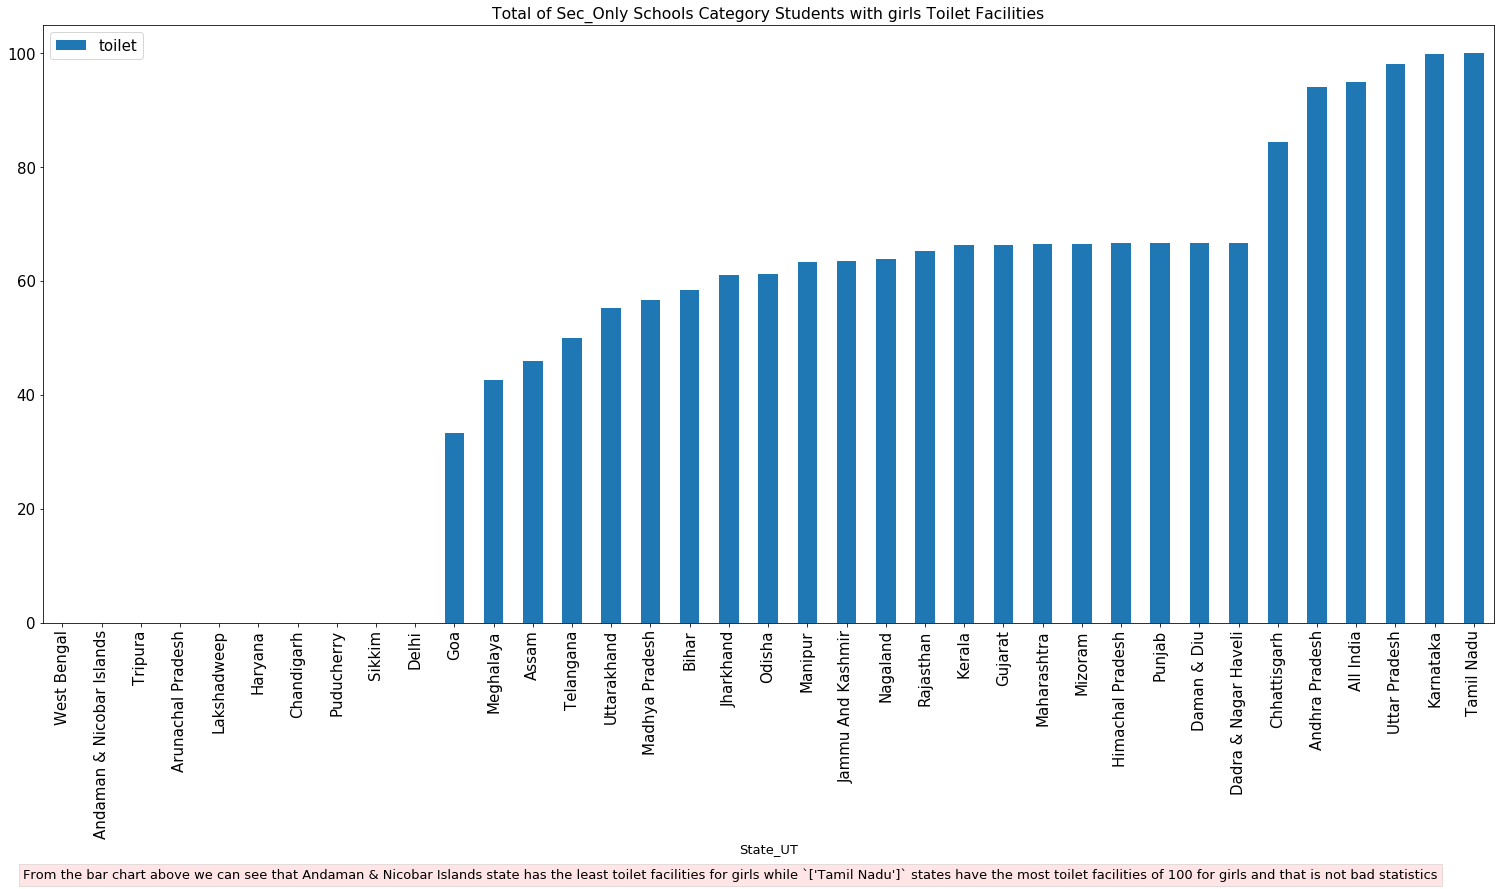

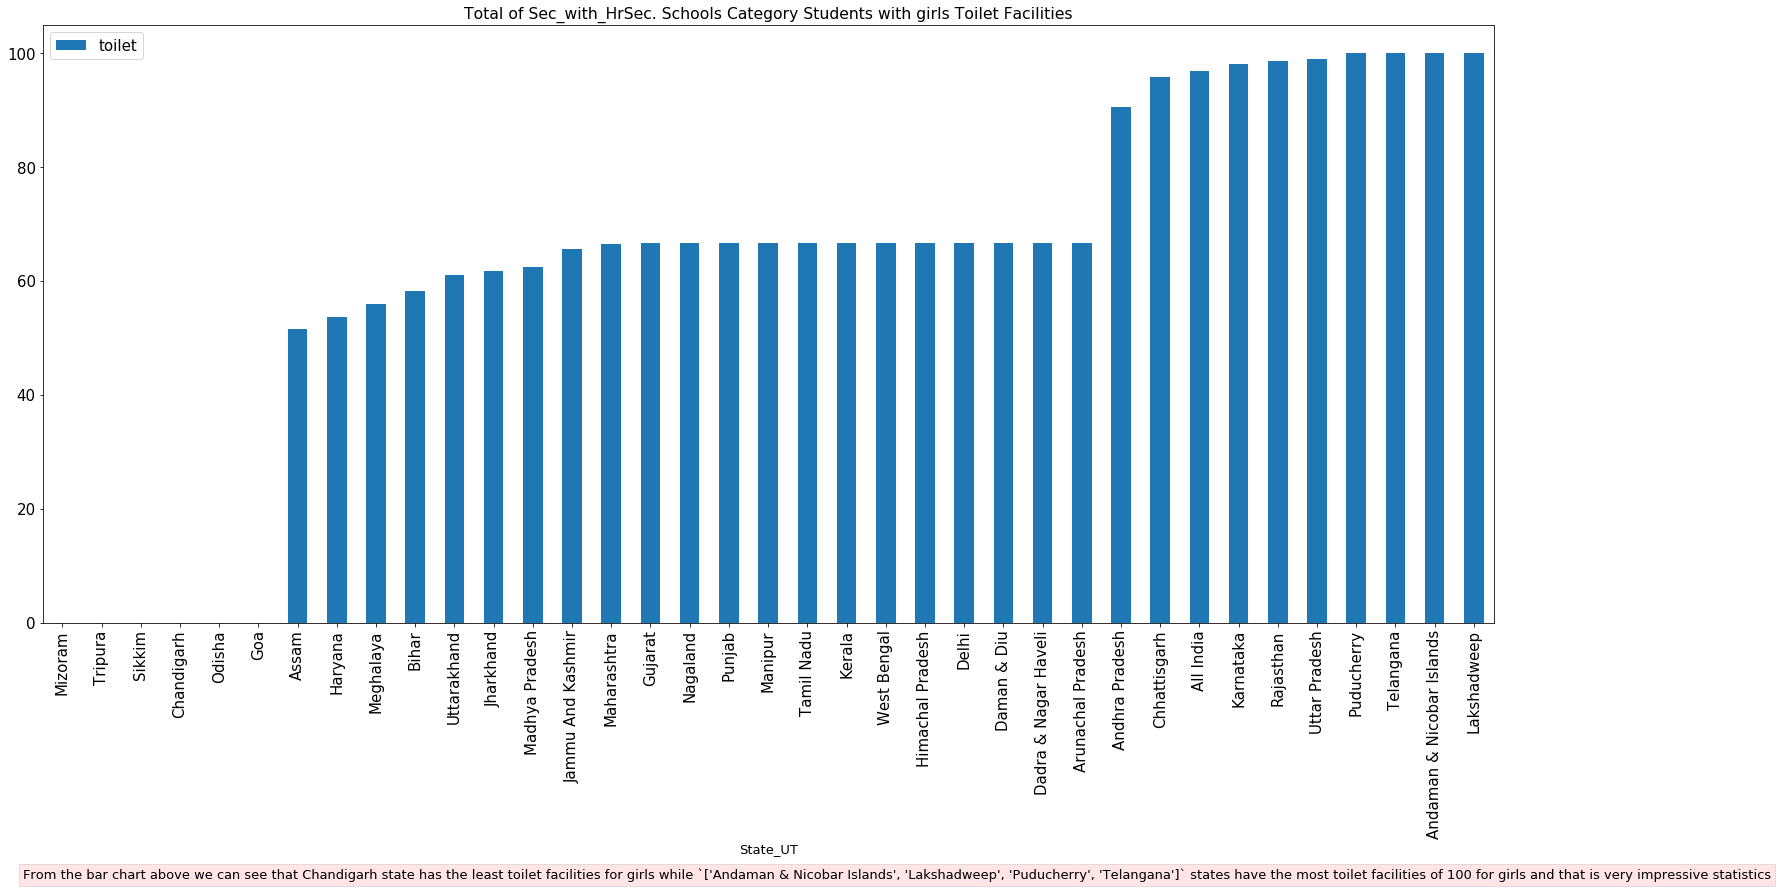

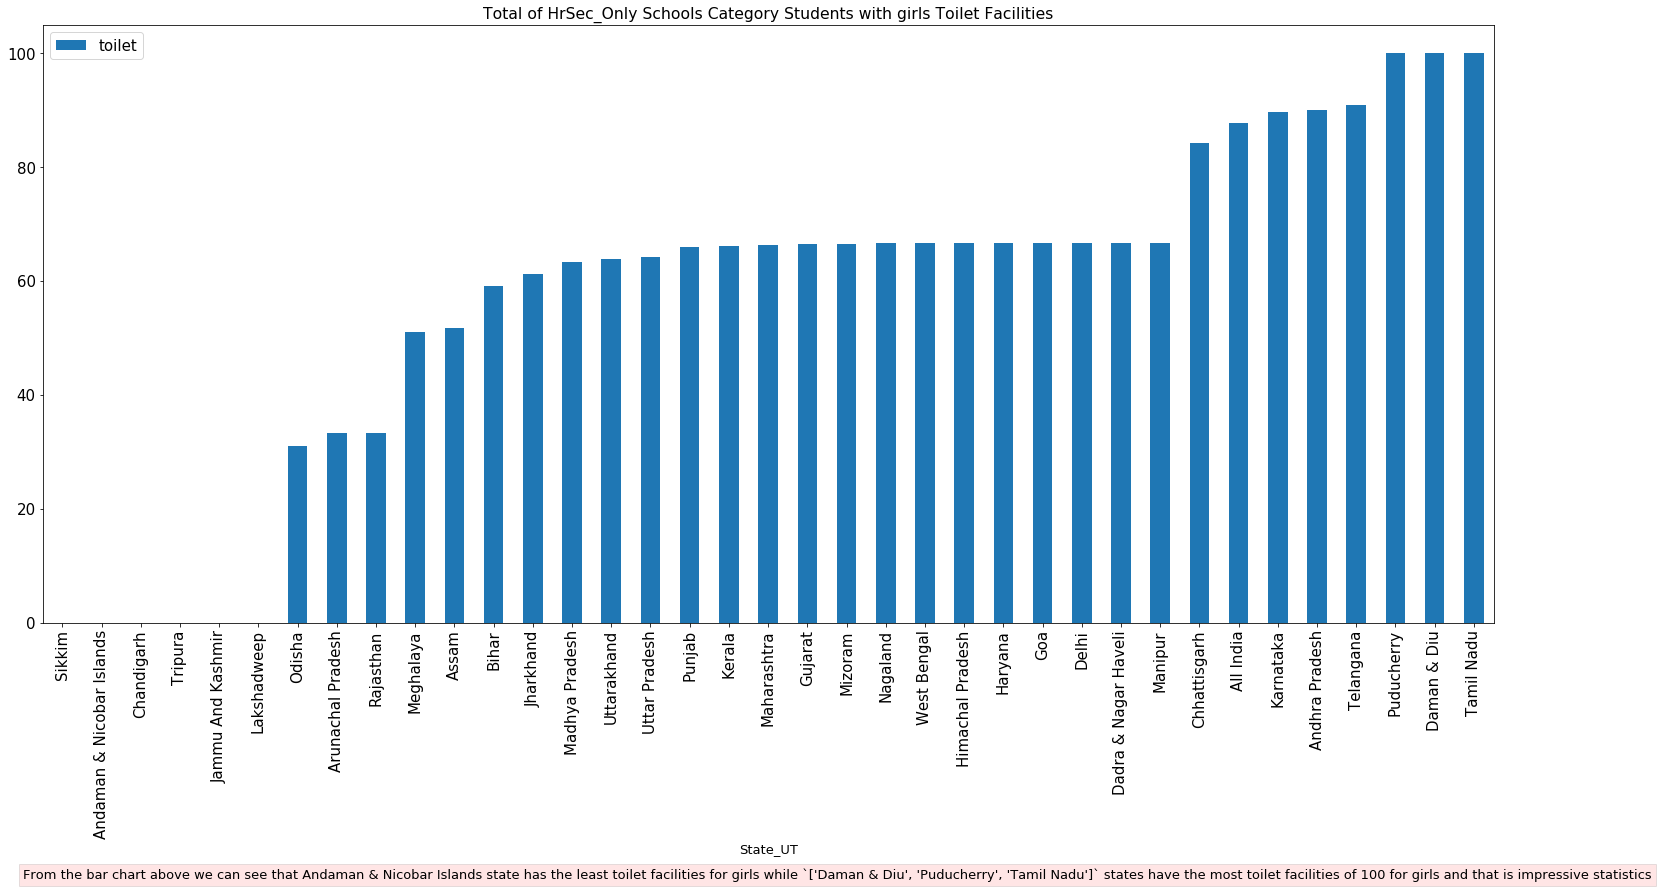

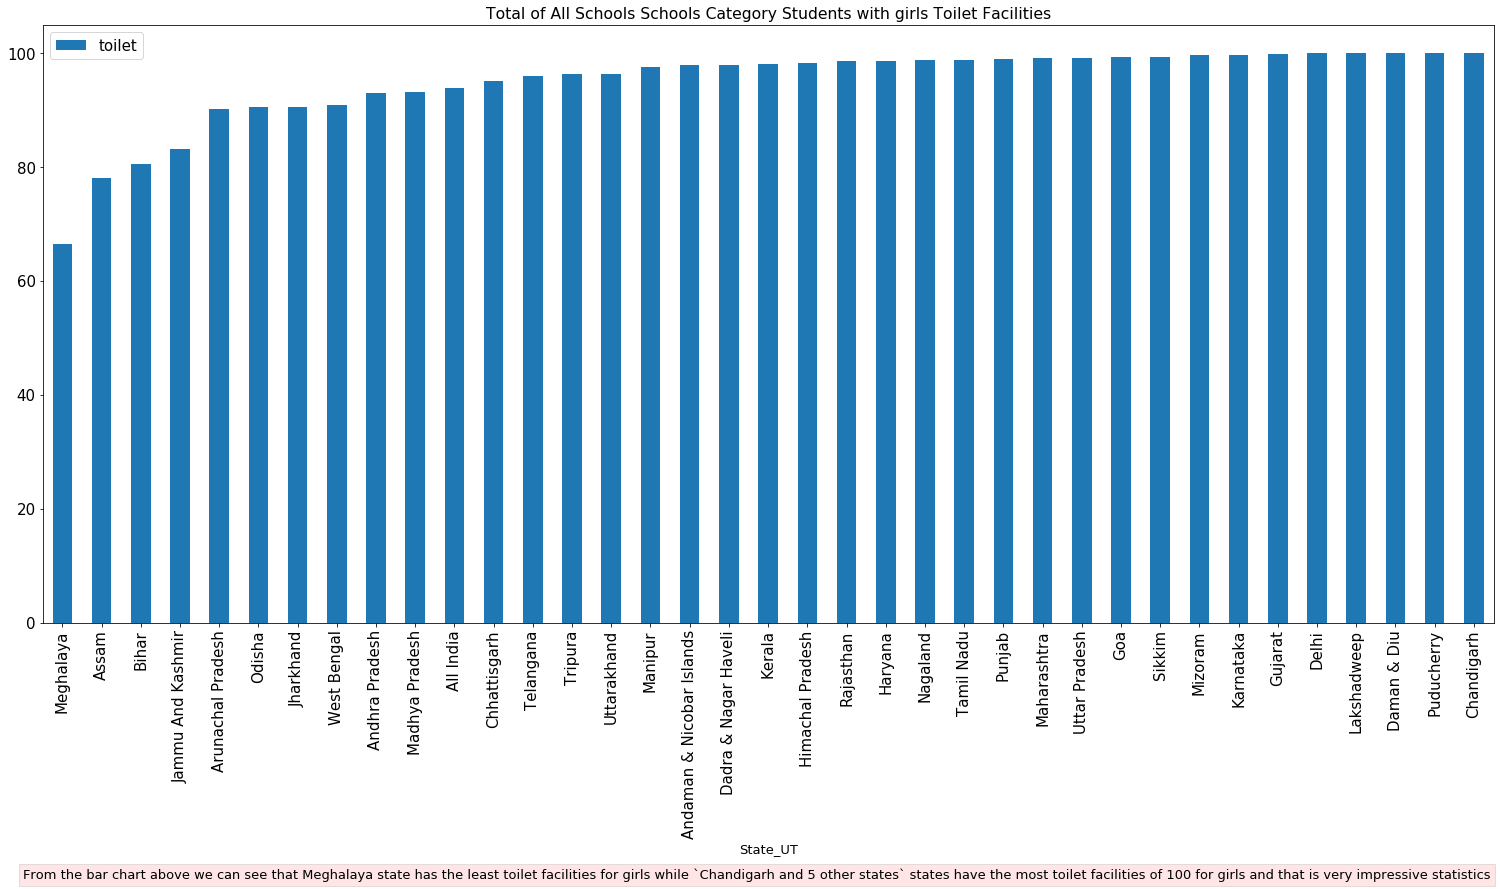

In [10]:
for category in categ:
    tmp_girls = girls_melted[girls_melted['School_Level'] == category]
    mean_tmp_girls = tmp_girls.groupby(['State_UT'], as_index=False).mean()
    mean_tmp_girls.set_index('State_UT').sort_values('toilet').plot(kind='bar', figsize=(26,11), title ='Total of {} Schools Category Students with girls Toilet Facilities'.format(category))
    tmp_highest = mean_tmp_girls.iloc[np.where(mean_tmp_girls['toilet'] == 100)].State_UT.to_list()
    tmp_lowest = mean_tmp_girls.iloc[mean_tmp_girls.toilet.idxmin()].State_UT
    
    if len(tmp_highest) == 1: impression = 'not bad'
    elif  len(tmp_highest) == 2: impression = 'okay'
    elif  len(tmp_highest) == 3: impression = 'impressive'
    else: impression = 'very impressive'
        
    if len(tmp_highest) > 4:
        tmp_highest = tmp_highest[0] + ' and {} other states'.format(len(tmp_highest))
    
    info = 'From the bar chart above we can see that {} state has the least toilet facilities for girls while `{}` states have the most toilet facilities of 100 for girls and that is {} statistics'.format(tmp_lowest, tmp_highest, impression)
    plt.text(x=-1, y=-45 , s = info, bbox=dict(facecolor='red', alpha=0.1))


## Toilet Facilities in 2013-2014 session

## Boys

In [11]:
boys_2013 = boys_melted.iloc[np.where(boys_melted.year=='2013-14')]

In [12]:
boys_2013.head(3)
boys_2013.shape

(396, 4)

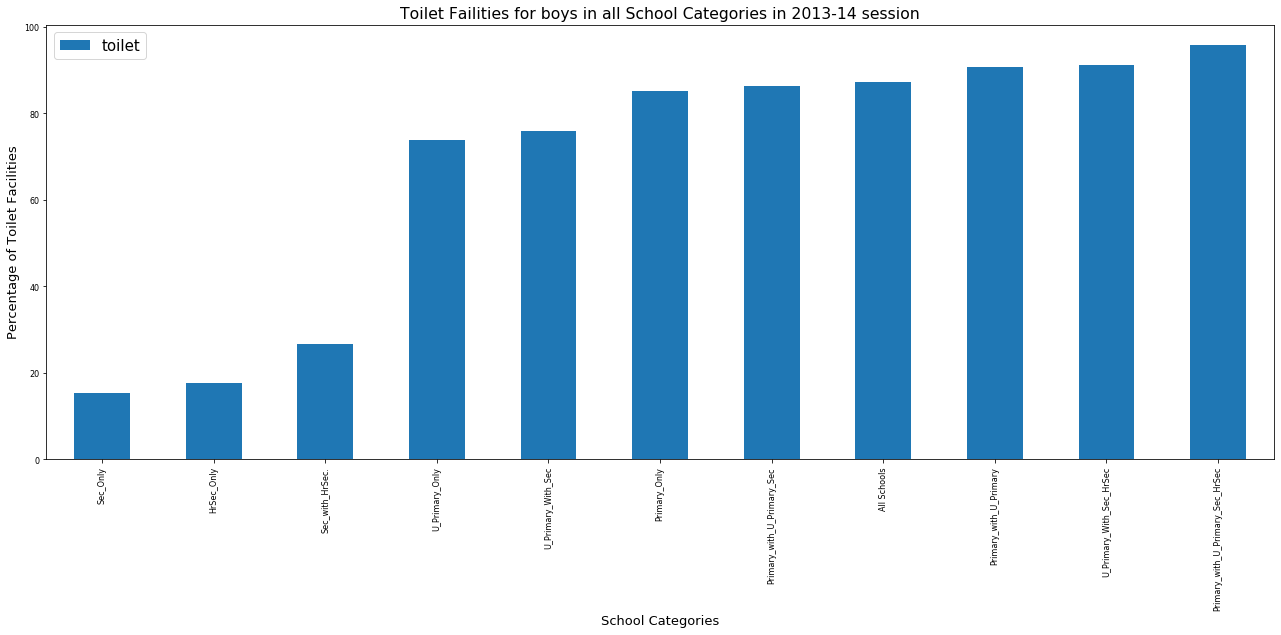

In [94]:
boys_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2013-14 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("b13.png", dpi = 280, bbox_inches = "tight")

## From the bar chart above we can clearly see that toilets facilities weren't much in secondary schools in 2013-14 session

## Toilet Facilities(BOYS) in 2014-2015 session

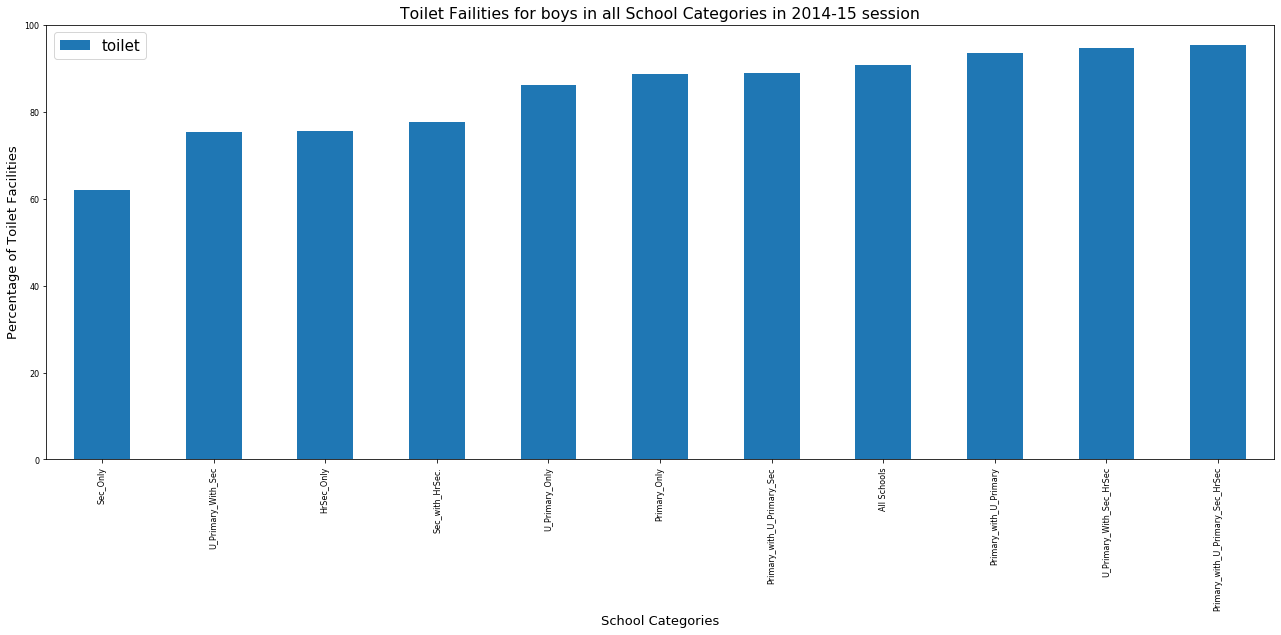

In [101]:
boys_2014 = boys_melted.iloc[np.where(boys_melted.year=='2014-15')]

boys_2014.head(3)
boys_2014.shape

boys_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2014-15 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("b14.png", dpi = 280, bbox_inches = "tight")

## From the bar chart above we can see rapid rise in the toilets facilities of in secondary schools in 2014-15 session, compared to last session, this is a big improvement

## Toilet Facilities(BOYS) in 2015-2016 session

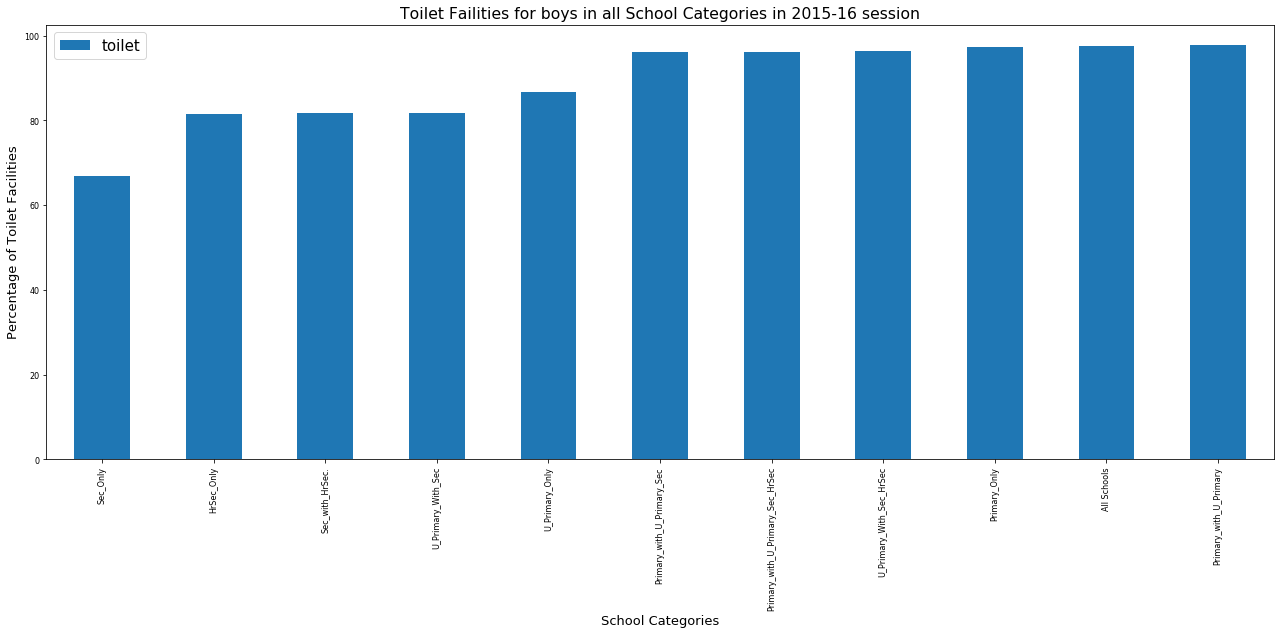

In [102]:
boys_2015 = boys_melted.iloc[np.where(boys_melted.year=='2015-16')]

boys_2015.head(3)
boys_2015.shape

boys_2015.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), title = 'Toilet Failities for boys in all School Categories in 2015-16 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("b15.png", dpi = 280, bbox_inches = "tight")

### There's little increase in the toilet facilities for secondary school students

## Toilet Facilities in 2013-2014 session

## Girls

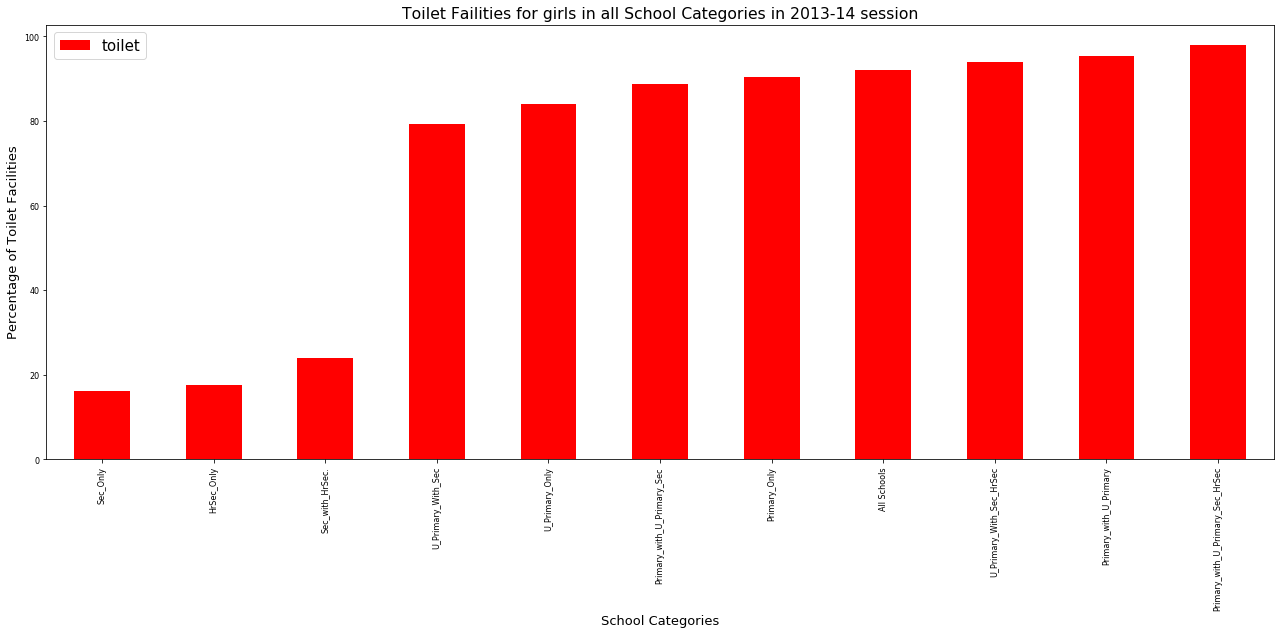

In [103]:
girls_2013 = girls_melted.iloc[np.where(girls_melted.year=='2013-14')]

girls_2013.head(3)
girls_2013.shape

girls_2013.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',figsize=(22,8), color = 'r', title = 'Toilet Failities for girls in all School Categories in 2013-14 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("g13.png", dpi = 280, bbox_inches = "tight")

## Same trend of awful toilet facilities for secondary school students in 2013-14 session.

## Toilet Facilities in 2014-2015 session

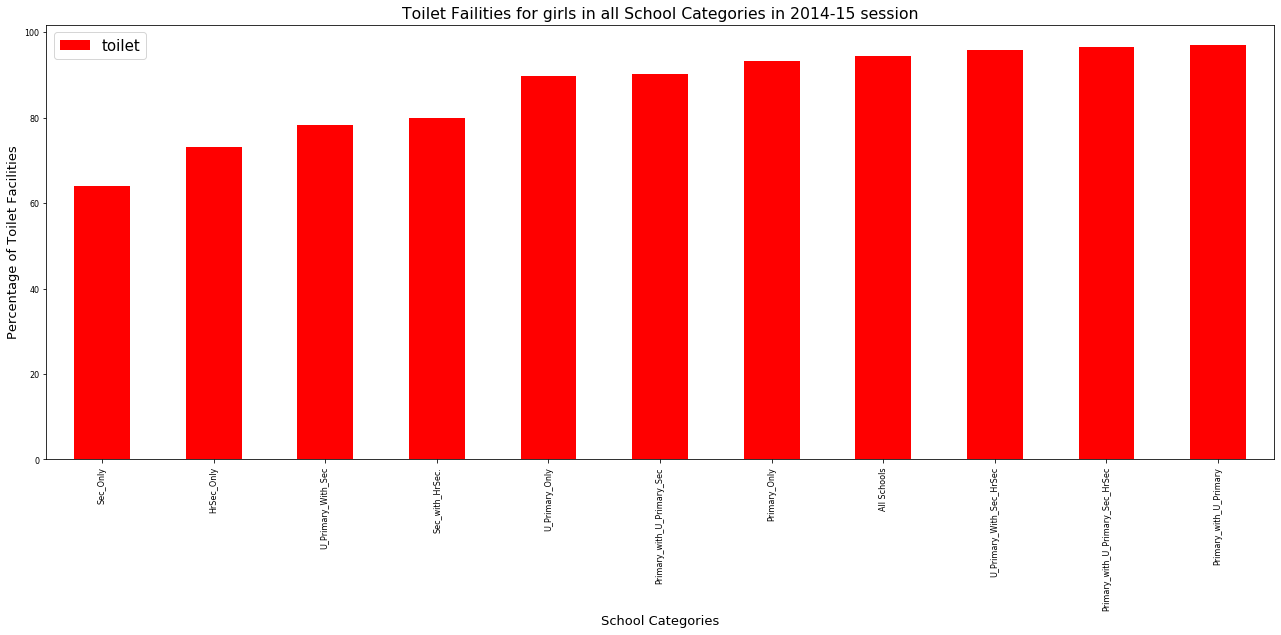

In [104]:
girls_2014 = girls_melted.iloc[np.where(girls_melted.year=='2014-15')]

girls_2014.head(3)
girls_2014.shape

girls_2014.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar', color = 'r', figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2014-15 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("g14.png", dpi = 280, bbox_inches = "tight")

## Once again rapid increse in the toilet facilities in the secondary school category in the 2014-15 session.

## Toilet Facilities in 2015-2016 session

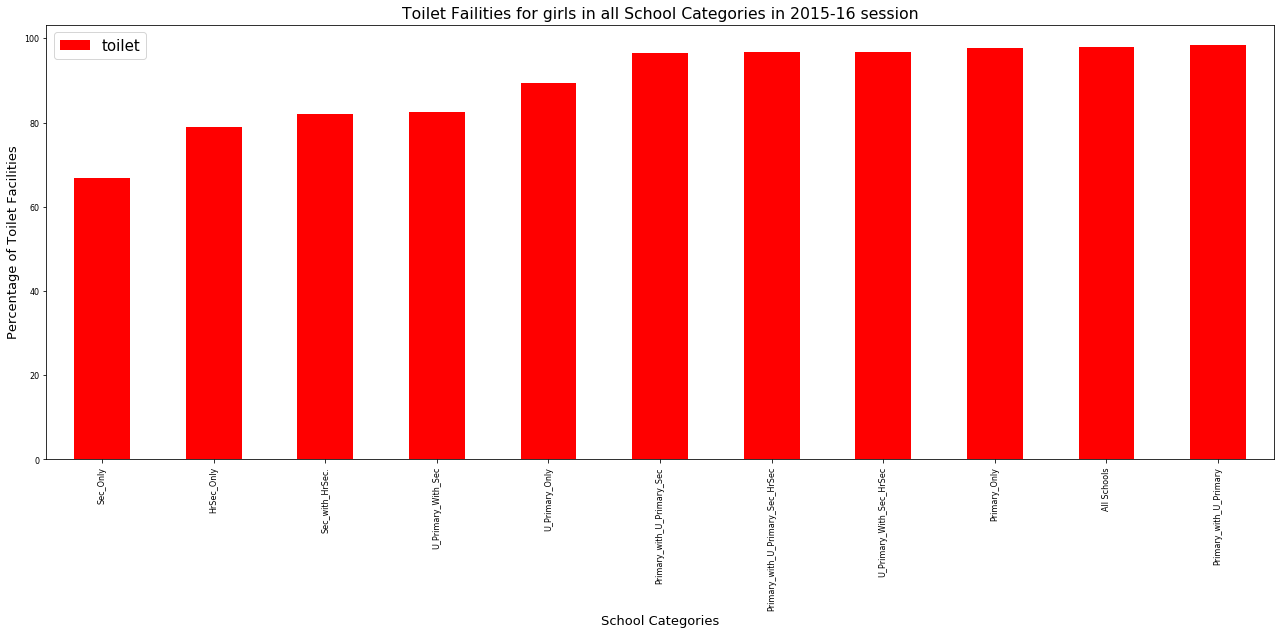

In [105]:
girls_2015 = girls_melted.iloc[np.where(girls_melted.year=='2015-16')]

girls_2015.head(3)
girls_2015.shape

girls_2015.groupby(['School_Level']).mean().sort_values(by='toilet').plot(kind='bar',color = 'r', figsize=(22,8), title = 'Toilet Failities for girls in all School Categories in 2015-16 session')
plt.xlabel("School Categories")
plt.ylabel("Percentage of Toilet Facilities")
plt.savefig("g15.png", dpi = 280, bbox_inches = "tight")

### There's little increase in the toilet facilities of secondary school students

## Toilet Facillities based on States location of Schools

## Boys

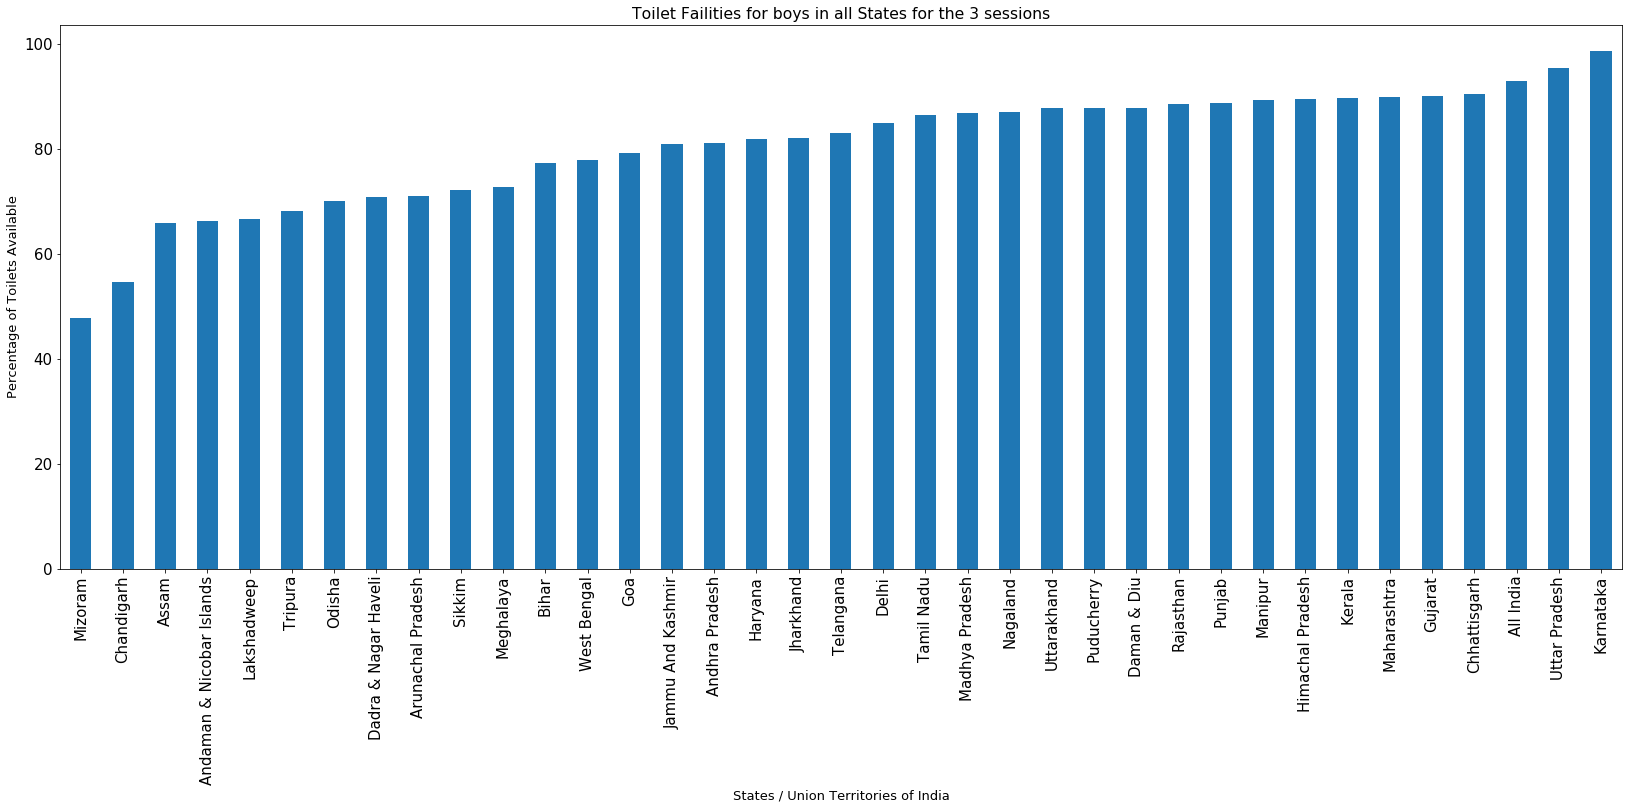

In [19]:
boys_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,10), title = 'Toilet Failities for boys in all States for the 3 sessions')
plt.xlabel("States / Union Territories of India")
plt.ylabel("Percentage of Toilets Available")
plt.savefig("toib.png", dpi = 280)

## We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Kamataka' has the best toilet facilities for boys.

## Toilet Facillities based on States location of Schools (2013-14)

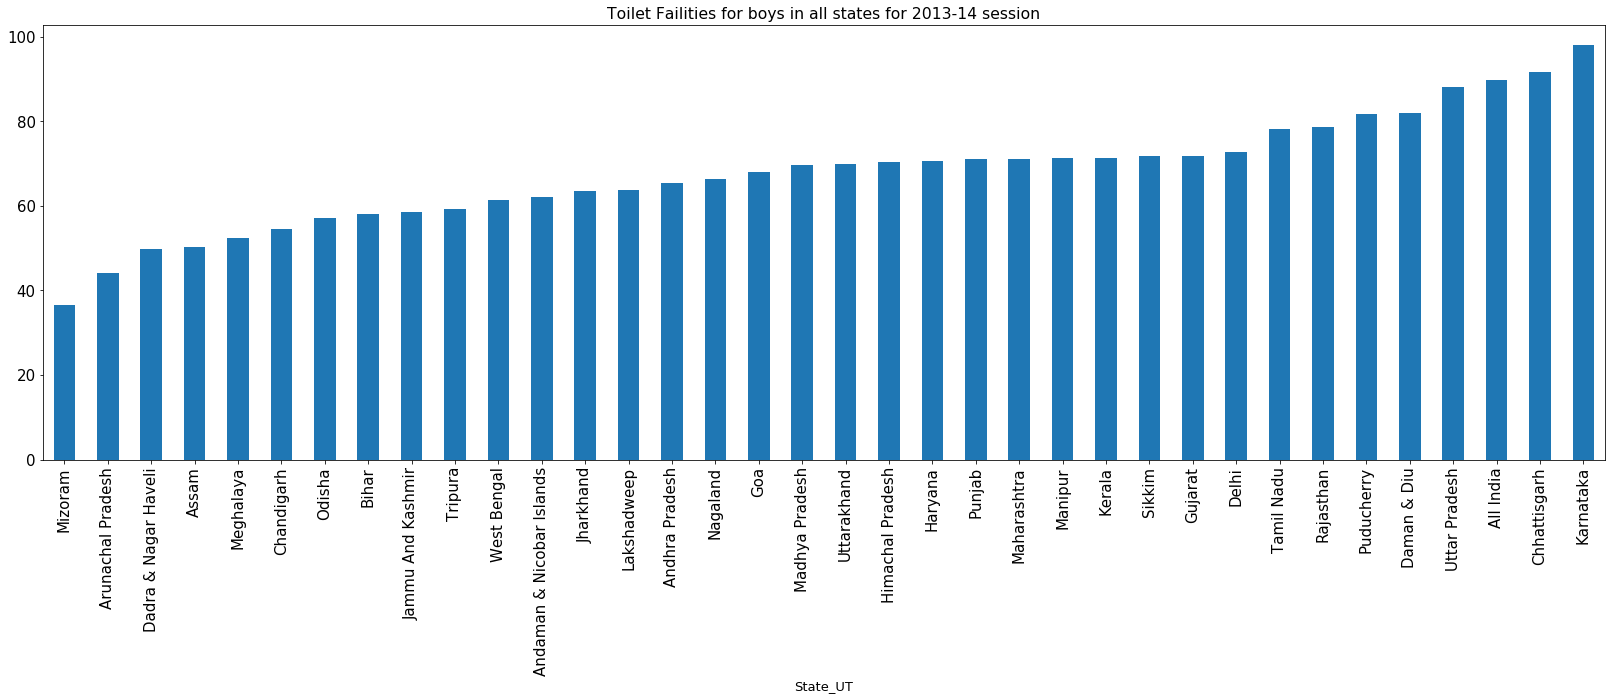

In [20]:
boys_2013.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2013-14 session')

### In the 2013-14 session 'Mizoram' state had the poorest toilet facility while 'Kamataka' had the best toilet facility for boys.

## Toilet Facillities based on States location of Schools (2014-15)

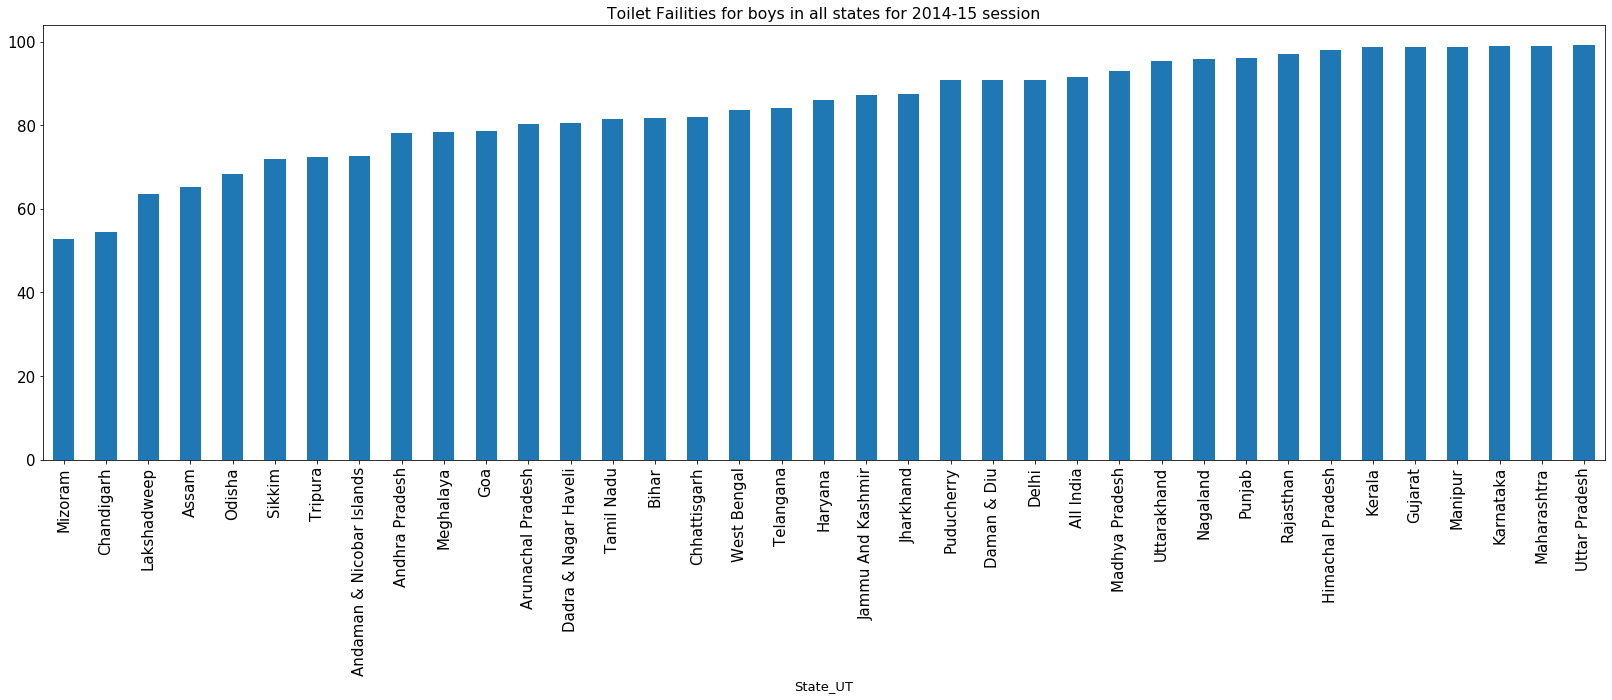

In [21]:
boys_2014.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2014-15 session')

### In the 2014-15 session 'Mizoram' state still had the poorest toilet facility while 'Uttar Pradesh' now had the best toilet facility for boys.

## Toilet Facillities based on States location of Schools (2015-16)

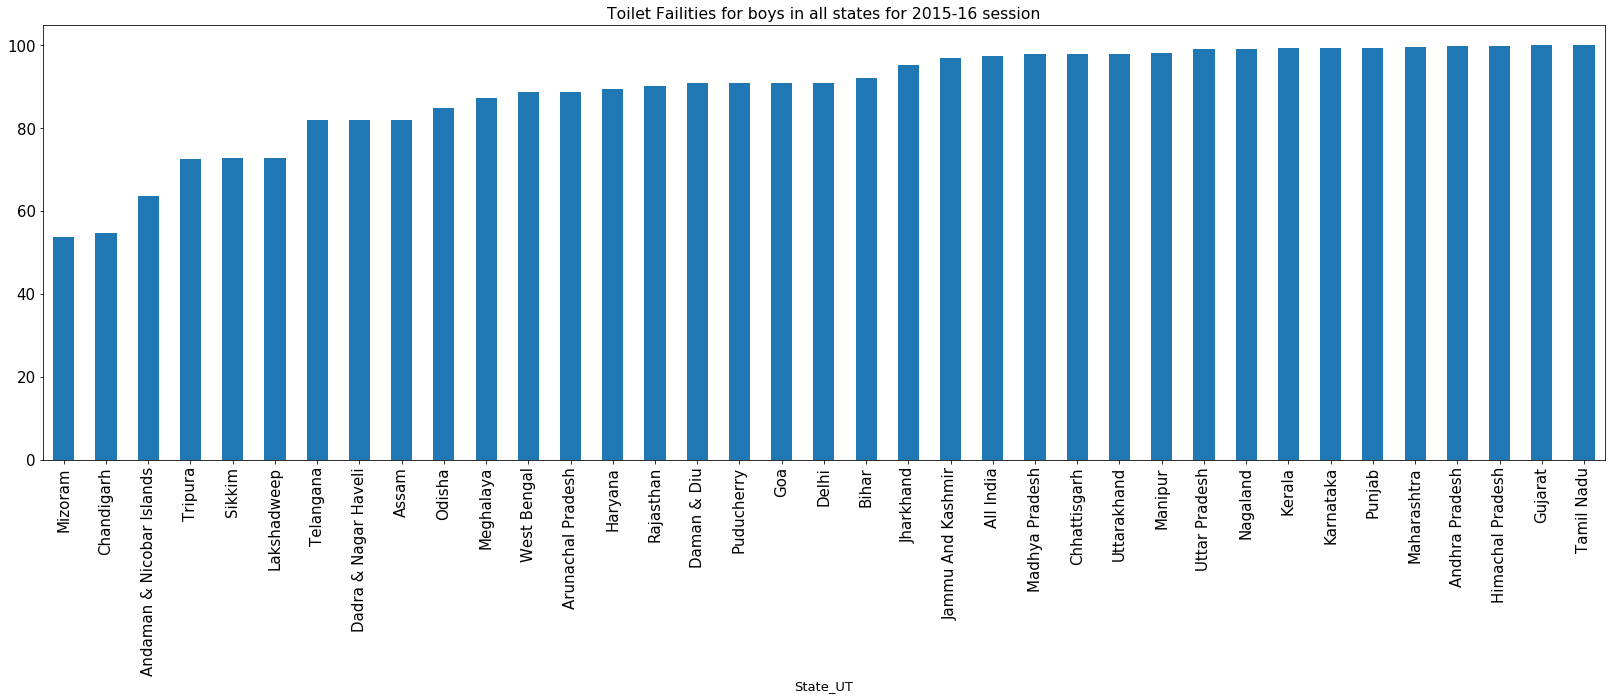

In [22]:
boys_2015.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all states for 2015-16 session')

### 'Mizoram' state still had the poorest toilet facility while 'Tamil Nadu' had the best toilet facility in 2015-16 session for boys.

## Girls

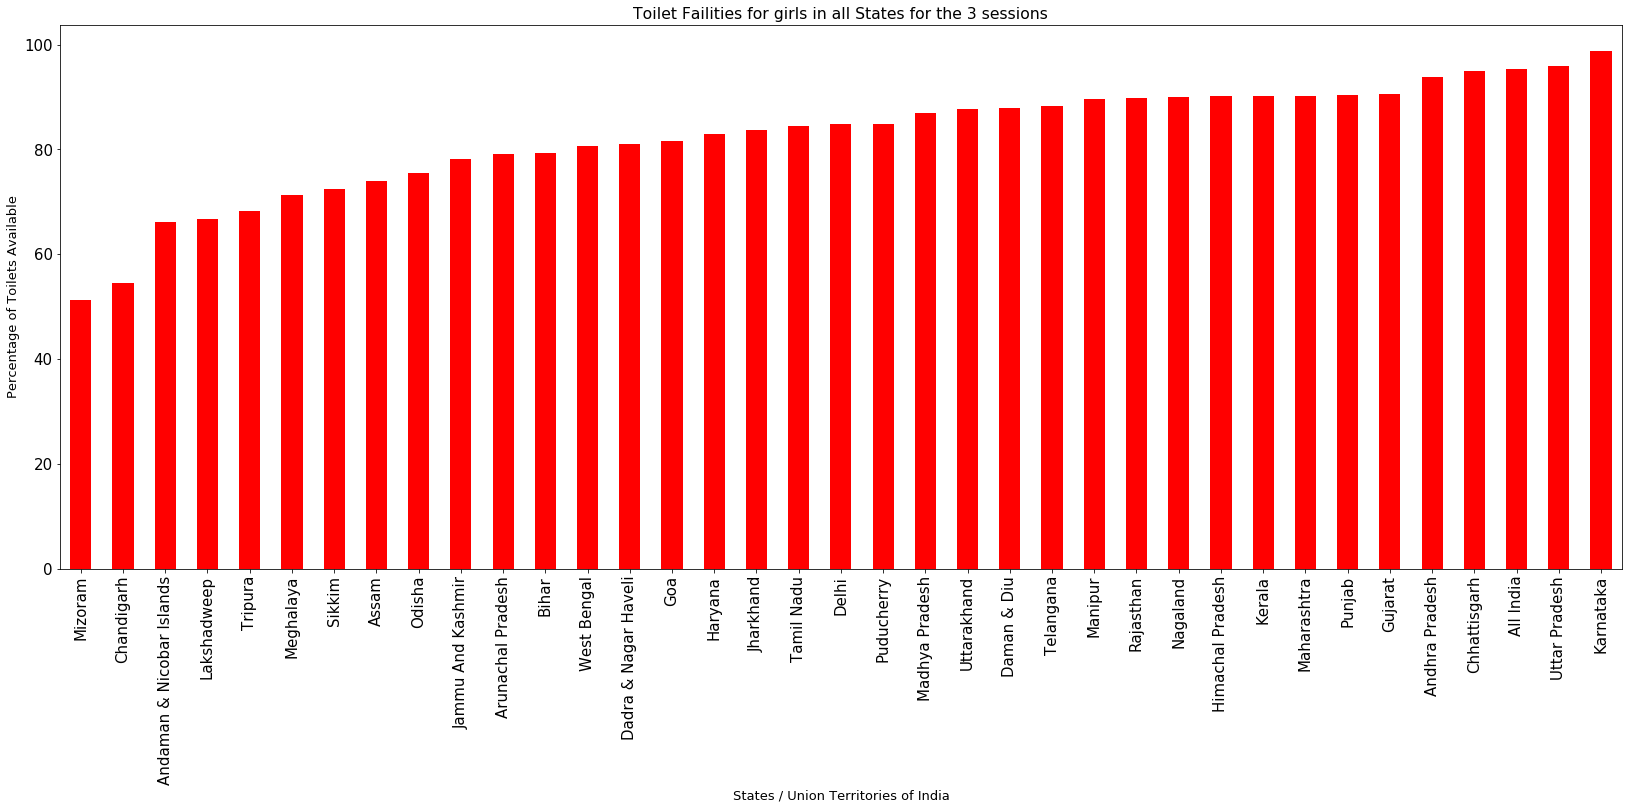

In [23]:
girls_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', color = 'r', figsize = (28,10), title = 'Toilet Failities for girls in all States for the 3 sessions')
plt.xlabel("States / Union Territories of India")
plt.ylabel("Percentage of Toilets Available")
plt.savefig("toig.png", dpi = 280)

## We can see clearly that 'Mizoram' state has the poorest toilet facilities and 'Kamataka' has the best toilet facilities for girls.

## Toilet Facillities based on States location of Schools (2013-14)

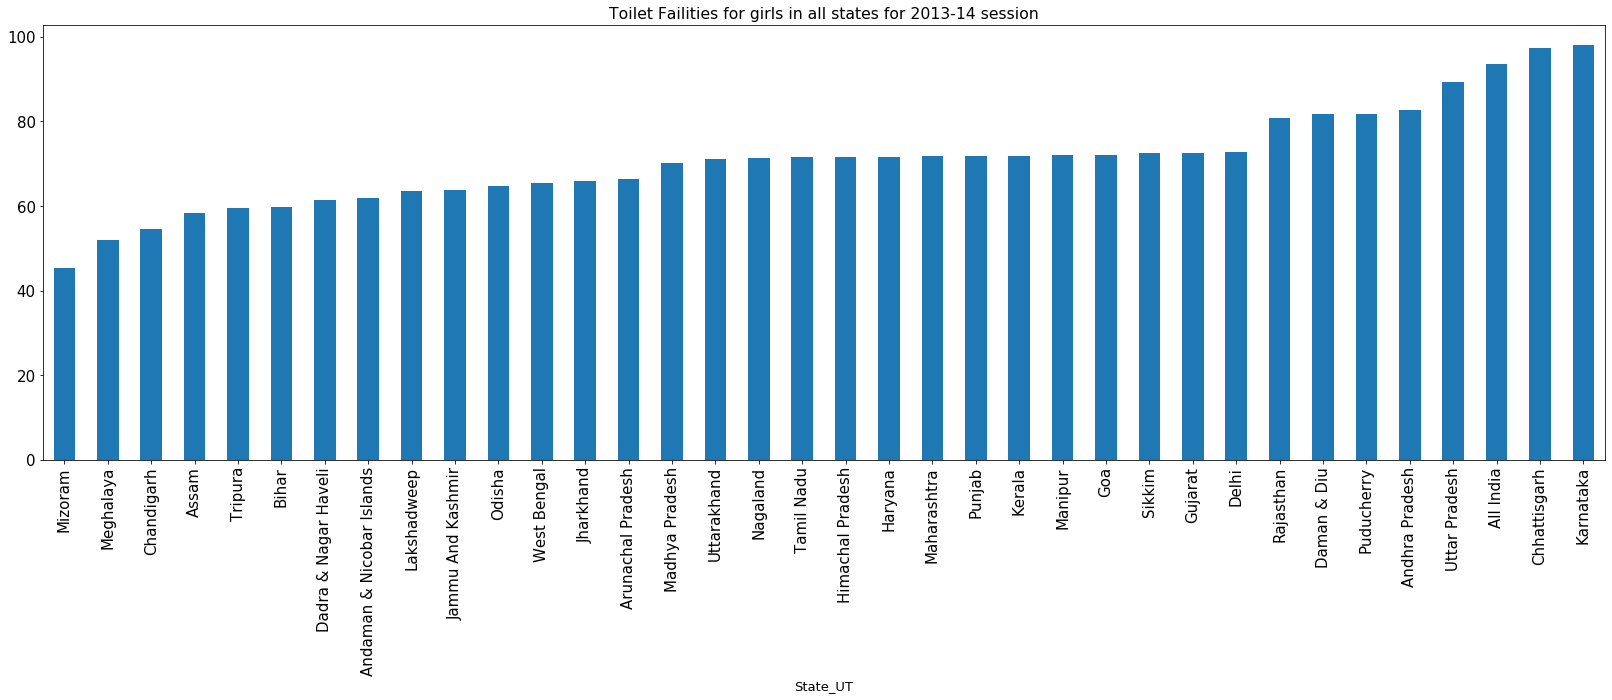

In [24]:
girls_2013.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2013-14 session')

### In the 2013-14 session 'Mizoram' state had the poorest toilet facility while 'Kamataka' had the best toilet facility for girls.

## Toilet Facillities based on States location of Schools (2014-15)

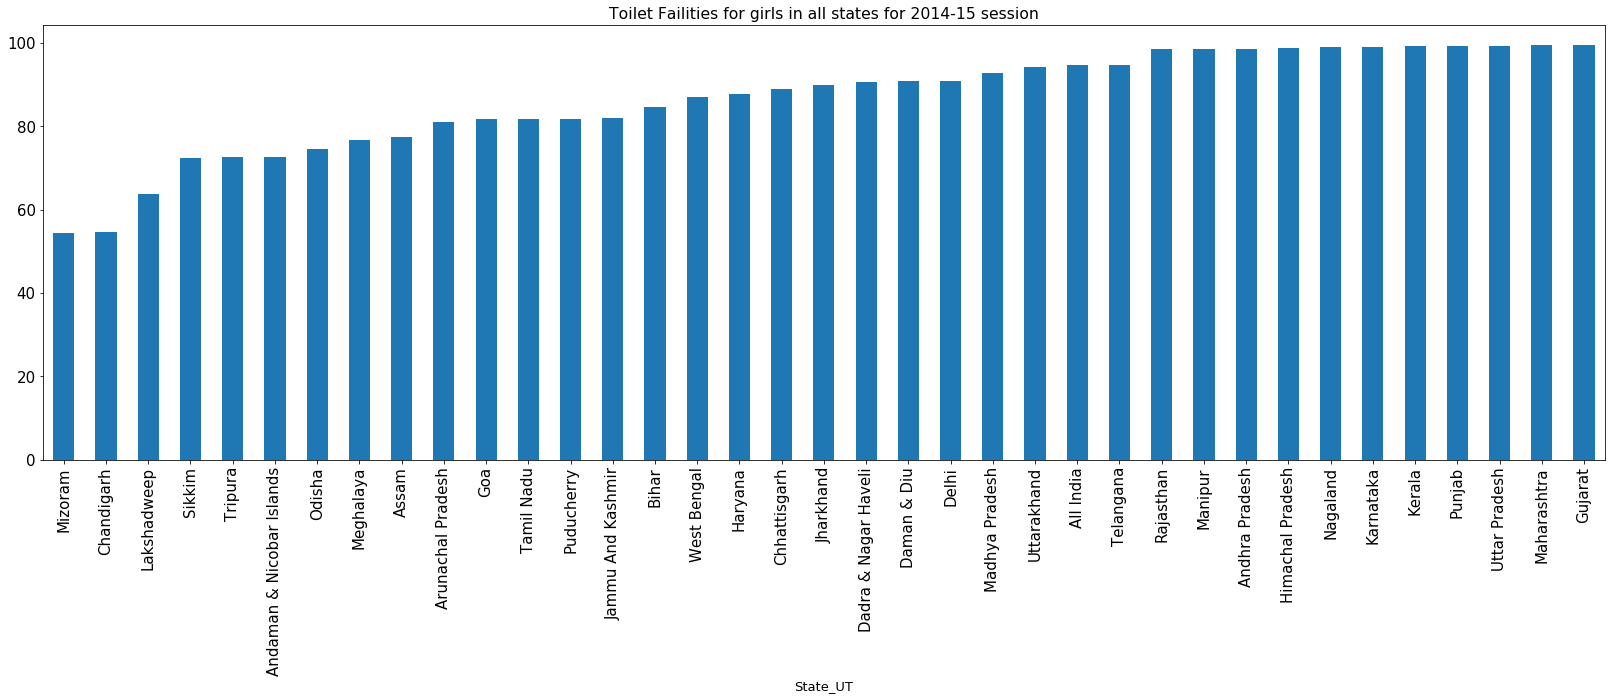

In [25]:
girls_2014.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2014-15 session')

### In the 2014-15 session 'Mizoram' state had the poorest toilet facility while 'Gujarat' had the best toilet facility for girls.

## Toilet Facillities based on States location of Schools (2015-16)

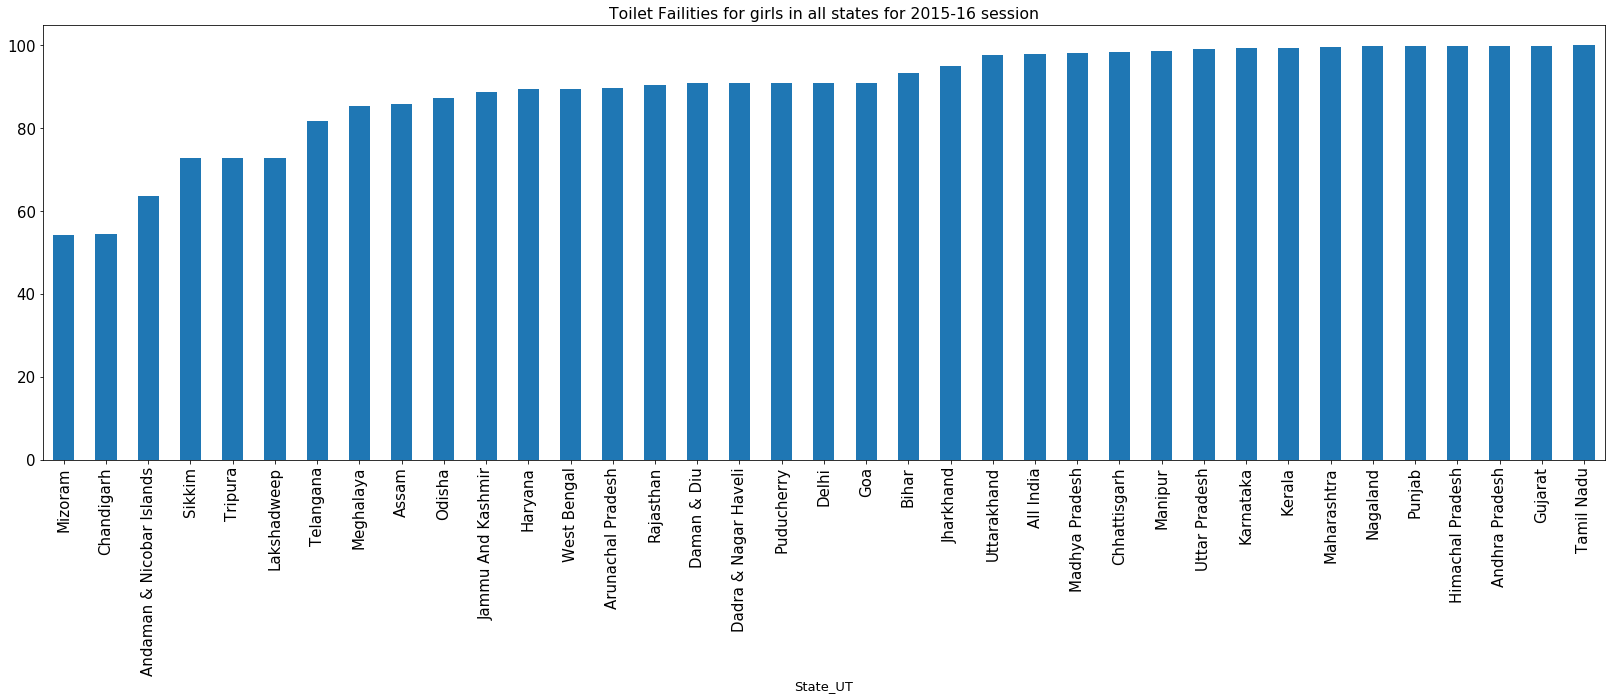

In [26]:
girls_2015.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all states for 2015-16 session')

### In the 2015-16 session'Mizoram' state still had the poorest toilet facility while 'Tamil Nadu' had the best toilet facility for girls

## Exploration of the state with the Overall Poorest Toilet Facilities 'Mizoram'

# Boys

In [27]:
boys_worst = boys.iloc[np.where(boys.State_UT=='Mizoram')]

In [28]:
boys_worst.head()
boys_worst.shape

(3, 13)

## Toilet Facilities in 2013-14 Session in Mizoram

In [29]:
cols_to_drop13 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2013-14')][col] > 0).to_list()[0] != True]
new_boys_worst13 = boys_worst.iloc[np.where(boys_worst.year == '2013-14')].drop(columns=['year']).drop(columns = cols_to_drop13)

print(len(cols_to_drop13))

6


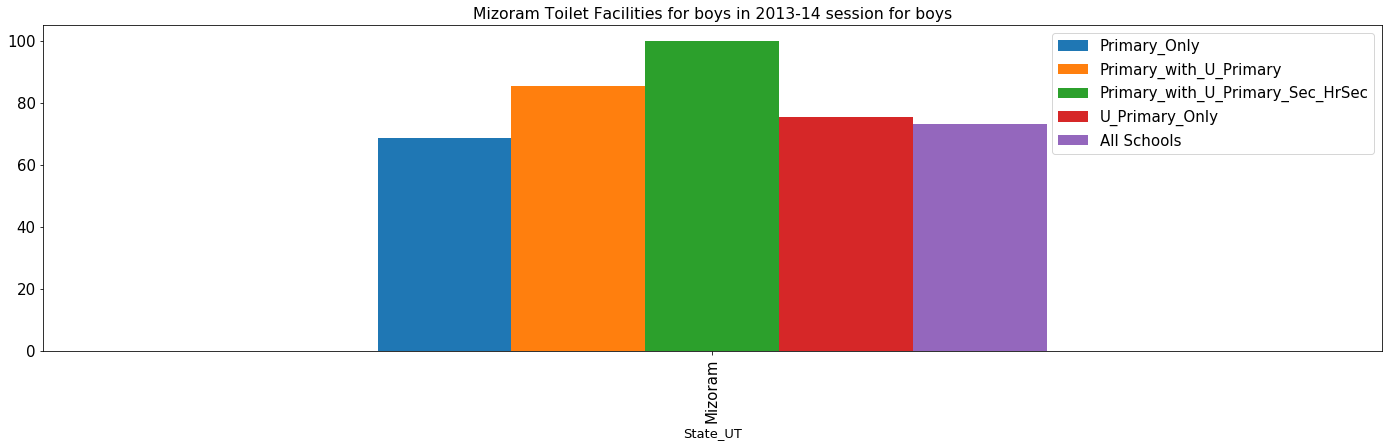

In [30]:
new_boys_worst13.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2013-14 session for boys')

## In 2013-14 session Primary_Only school category had the least toilet facility among the category types that had toilet facilities. 
### 6 other school categories had 0 toilet facilities this same year for boys

## Toilet Facilities in 2014-15 Session in Mizoram

5


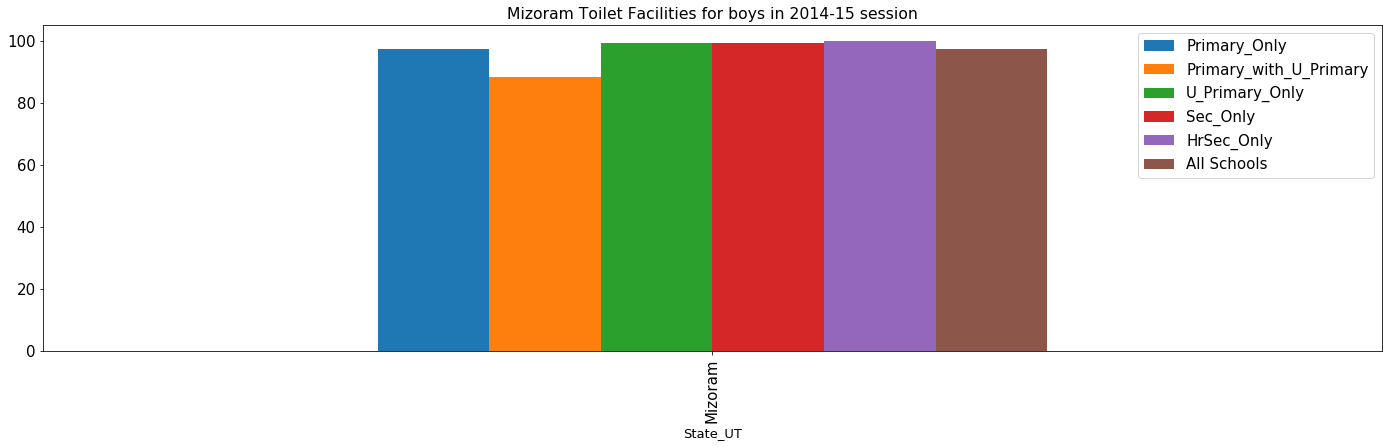

In [31]:
cols_to_drop14 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2014-15')][col] > 0).to_list()[0] != True]

new_boys_worst14 = boys_worst.iloc[np.where(boys_worst.year == '2014-15')].drop(columns=['year']).drop(columns = cols_to_drop14)

new_boys_worst14.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2014-15 session')

print(len(cols_to_drop14))

## In 2014-15 session 'Primary_with_U_Primary' school category had the least toilet facility among the category types that had toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year

## Toilet Facilities in 2015-16 Session in Mizoram

5


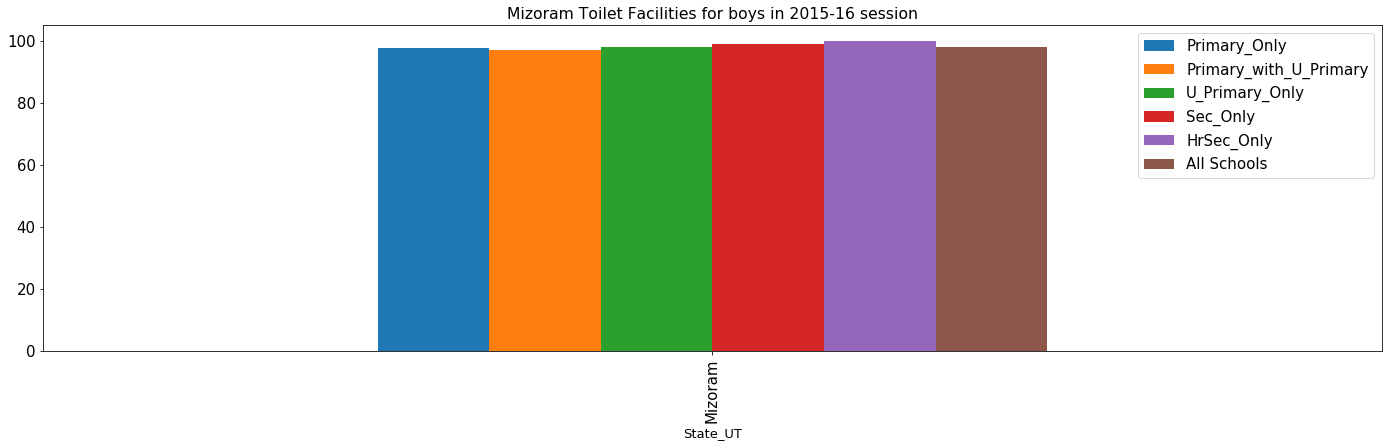

In [32]:
cols_to_drop15 = [ col for col in categ if (boys_worst.iloc[np.where(boys_worst.year == '2015-16')][col] > 0).to_list()[0] != True]

new_boys_worst15 = boys_worst.iloc[np.where(boys_worst.year == '2015-16')].drop(columns=['year']).drop(columns = cols_to_drop15)

new_boys_worst15.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for boys in 2015-16 session')

print(len(cols_to_drop15))

## In 2015-16 session All displayed school category in the chart have decent toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year for boys.

# Girls

In [33]:
girls_worst = girls.iloc[np.where(girls.State_UT=='Mizoram')]

girls_worst.head()
girls_worst.shape

(3, 13)

## Toilet Facilities in 2013-14 Session in Mizoram

In [34]:
COLS_to_drop13 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2013-14')][col] > 0).to_list()[0] != True]
new_girls_worst13 = girls_worst.iloc[np.where(girls_worst.year == '2013-14')].drop(columns=['year']).drop(columns = COLS_to_drop13)

print(len(COLS_to_drop13))

6


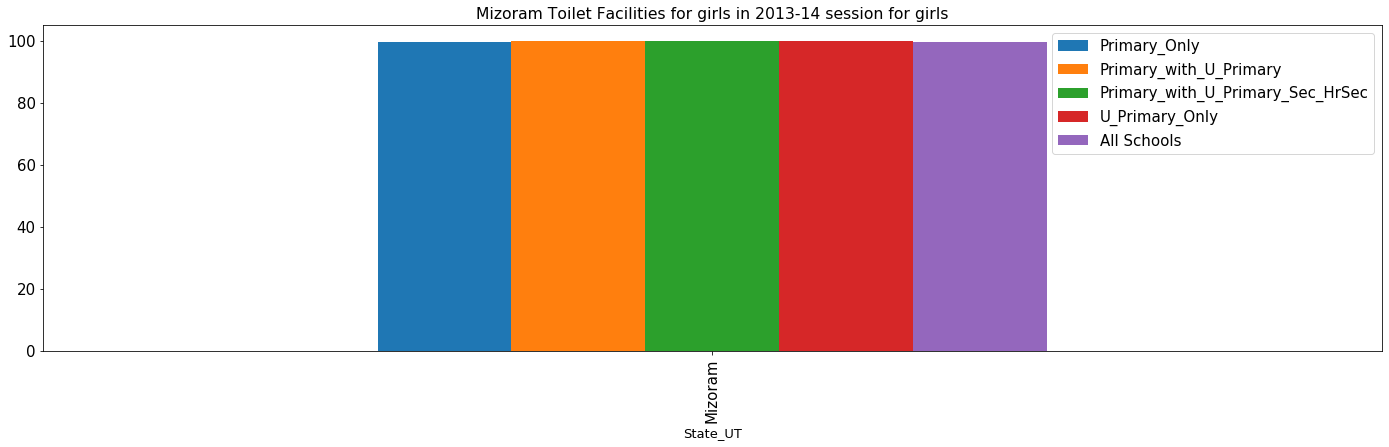

In [35]:
new_girls_worst13.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2013-14 session for girls')

## All the student categories that had toilet facilities had enough.
### In this same year other 6 student categories had 0 toilet facilities.
### The primary category for boys in this same year suffered to about 60, but it's a decent 99.xx for girls...

## Toilet Facilities in 2014-15 Session in Mizoram

5


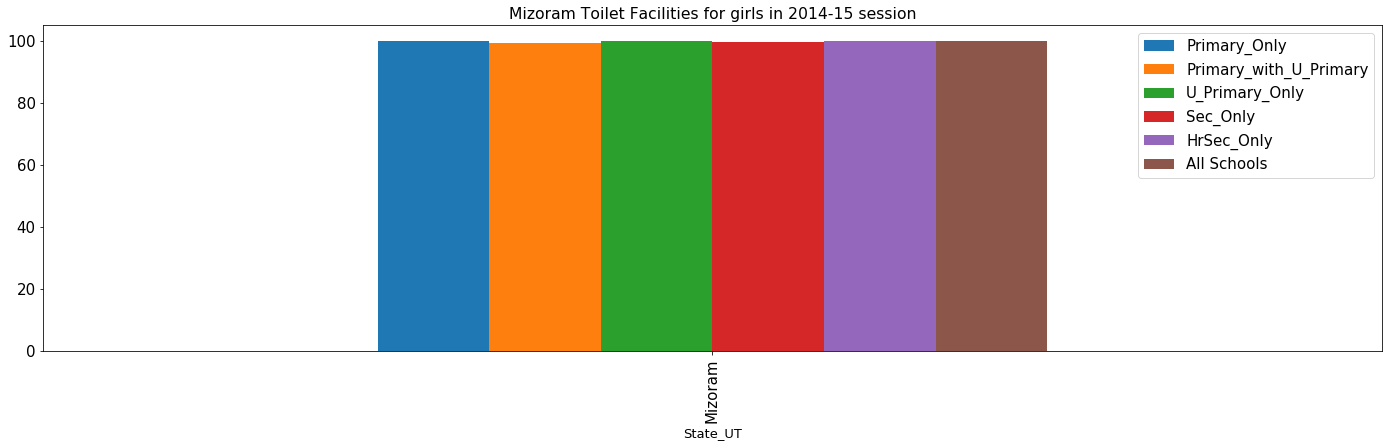

In [36]:
COLS_to_drop14 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2014-15')][col] > 0).to_list()[0] != True]

new_girls_worst14 = girls_worst.iloc[np.where(girls_worst.year == '2014-15')].drop(columns=['year']).drop(columns = COLS_to_drop14)

new_girls_worst14.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2014-15 session')

print(len(COLS_to_drop14))

## In 2014-15 session 'Primary_with_U_Primary' school category had the least toilet facility among the category types that had toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year

## Toilet Facilities in 2015-16 Session in Mizoram

5


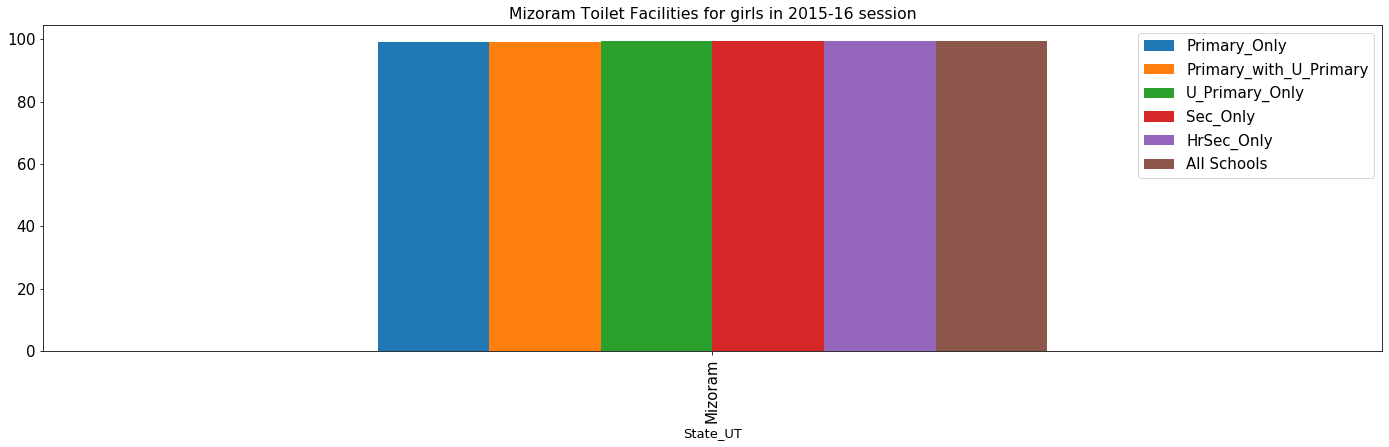

In [37]:
COLS_to_drop15 = [ col for col in categ if (girls_worst.iloc[np.where(girls_worst.year == '2015-16')][col] > 0).to_list()[0] != True]

new_girls_worst15 = girls_worst.iloc[np.where(girls_worst.year == '2015-16')].drop(columns=['year']).drop(columns = COLS_to_drop15)

new_girls_worst15.set_index('State_UT').plot(kind='bar', figsize=(24,6), title='Mizoram Toilet Facilities for girls in 2015-16 session')

print(len(COLS_to_drop15))

## In 2015-16 session All displayed school category in the chart have decent toilet facilities. 
### 5 other school categories had 0 toilet facilities this same year for girls.

### Brief exoloration of student categories that had 0 toilet facilities in Mizoram

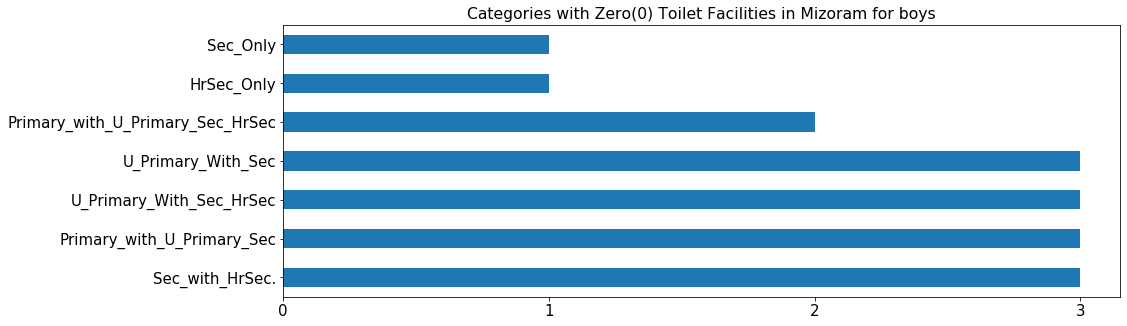

In [38]:
pd.concat([pd.Series(cols_to_drop13), pd.Series(cols_to_drop14), pd.Series(cols_to_drop15)]).value_counts().plot(kind='barh',xticks=[0,1,2,3],figsize=(15, 5),title='Categories with Zero(0) Toilet Facilities in Mizoram for boys')

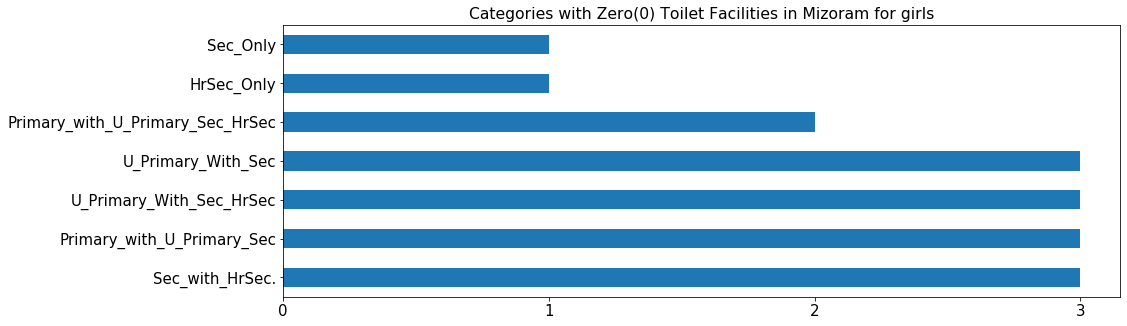

In [39]:
pd.concat([pd.Series(COLS_to_drop13), pd.Series(COLS_to_drop14), pd.Series(COLS_to_drop15)]).value_counts().plot(kind='barh',xticks=[0,1,2,3],figsize=(15, 5),title='Categories with Zero(0) Toilet Facilities in Mizoram for girls')

### <q>U_Primary_With_Sec<q>' is the student category with the most recurring Zeroes(0) of Toilet Facilities for both boys and girls in Mizoram State

In [40]:
aa = boys_melted.groupby(['State_UT', "year", "School_Level"])['toilet'].mean()
aa

State_UT     year     School_Level              
All India    2013-14  All Schools                    86.56
                      HrSec_Only                     74.36
                      Primary_Only                   84.01
                      Primary_with_U_Primary         91.44
                      Primary_with_U_Primary_Sec     94.51
                                                     ...  
West Bengal  2015-16  Sec_Only                        0.00
                      Sec_with_HrSec.               100.00
                      U_Primary_Only                 98.86
                      U_Primary_With_Sec             99.64
                      U_Primary_With_Sec_HrSec       99.83
Name: toilet, Length: 1210, dtype: float64

In [41]:
bb = girls_melted.groupby(['State_UT', "year", "School_Level"])['toilet'].mean()
bb

State_UT     year     School_Level              
All India    2013-14  All Schools                    91.23
                      HrSec_Only                     76.14
                      Primary_Only                   88.68
                      Primary_with_U_Primary         95.98
                      Primary_with_U_Primary_Sec     97.33
                                                     ...  
West Bengal  2015-16  Sec_Only                        0.00
                      Sec_with_HrSec.               100.00
                      U_Primary_Only                 99.02
                      U_Primary_With_Sec            100.00
                      U_Primary_With_Sec_HrSec       99.97
Name: toilet, Length: 1210, dtype: float64

In [42]:
xx = list(bb.values)

In [43]:
joined = aa.to_frame()
joined

toilet
State_UT    year    School_Level                      
All India   2013-14 All Schools                  86.56
                    HrSec_Only                   74.36
                    Primary_Only                 84.01
                    Primary_with_U_Primary       91.44
                    Primary_with_U_Primary_Sec   94.51
...                                                ...
West Bengal 2015-16 Sec_Only                      0.00
                    Sec_with_HrSec.             100.00
                    U_Primary_Only               98.86
                    U_Primary_With_Sec           99.64
                    U_Primary_With_Sec_HrSec     99.83

[1210 rows x 1 columns]

In [44]:
assert list(aa.index.values) == list(bb.index.values)

In [45]:
joined["Girls_Total"] = xx

In [46]:
joined

toilet  Girls_Total
State_UT    year    School_Level                                   
All India   2013-14 All Schools                  86.56        91.23
                    HrSec_Only                   74.36        76.14
                    Primary_Only                 84.01        88.68
                    Primary_with_U_Primary       91.44        95.98
                    Primary_with_U_Primary_Sec   94.51        97.33
...                                                ...          ...
West Bengal 2015-16 Sec_Only                      0.00         0.00
                    Sec_with_HrSec.             100.00       100.00
                    U_Primary_Only               98.86        99.02
                    U_Primary_With_Sec           99.64       100.00
                    U_Primary_With_Sec_HrSec     99.83        99.97

[1210 rows x 2 columns]

In [47]:
joined["total"] = (joined["toilet"] + joined["Girls_Total"])/2
joined

toilet  Girls_Total    total
State_UT    year    School_Level                                            
All India   2013-14 All Schools                  86.56        91.23   88.895
                    HrSec_Only                   74.36        76.14   75.250
                    Primary_Only                 84.01        88.68   86.345
                    Primary_with_U_Primary       91.44        95.98   93.710
                    Primary_with_U_Primary_Sec   94.51        97.33   95.920
...                                                ...          ...      ...
West Bengal 2015-16 Sec_Only                      0.00         0.00    0.000
                    Sec_with_HrSec.             100.00       100.00  100.000
                    U_Primary_Only               98.86        99.02   98.940
                    U_Primary_With_Sec           99.64       100.00   99.820
                    U_Primary_With_Sec_HrSec     99.83        99.97   99.900

[1210 rows x 3 columns]

In [48]:
joined.drop(["toilet", "Girls_Total"], axis = 1, inplace = True)
joined

total
State_UT    year    School_Level                       
All India   2013-14 All Schools                  88.895
                    HrSec_Only                   75.250
                    Primary_Only                 86.345
                    Primary_with_U_Primary       93.710
                    Primary_with_U_Primary_Sec   95.920
...                                                 ...
West Bengal 2015-16 Sec_Only                      0.000
                    Sec_with_HrSec.             100.000
                    U_Primary_Only               98.940
                    U_Primary_With_Sec           99.820
                    U_Primary_With_Sec_HrSec     99.900

[1210 rows x 1 columns]

In [49]:
joined.reset_index(inplace = True)

In [50]:
joined[(joined["year"] == "2013-14") & (joined["School_Level"] == "All Schools")]

,State_UT,year,School_Level,total
0,All India,2013-14,All Schools,88.895
33,Andaman & Nicobar Islands,2013-14,All Schools,93.980
66,Andhra Pradesh,2013-14,All Schools,69.095
99,Arunachal Pradesh,2013-14,All Schools,62.815
132,Assam,2013-14,All Schools,67.725
165,Bihar,2013-14,All Schools,74.415
198,Chandigarh,2013-14,All Schools,100.000
231,Chhattisgarh,2013-14,All Schools,88.475
264,Dadra & Nagar Haveli,2013-14,All Schools,89.945
297,Daman & Diu,2013-14,All Schools,100.000


In [51]:
lll= joined.groupby(["year", "School_Level"])['total'].mean()
lll = lll.to_frame()

In [52]:
lll.reset_index(inplace=True)
lll

,year,School_Level,total
0,2013-14,All Schools,89.688750
1,2013-14,HrSec_Only,17.640417
2,2013-14,Primary_Only,87.767083
3,2013-14,Primary_with_U_Primary,93.100833
4,2013-14,Primary_with_U_Primary_Sec,87.612222
5,2013-14,Primary_with_U_Primary_Sec_HrSec,96.837917
6,2013-14,Sec_Only,15.661389
7,2013-14,Sec_with_HrSec.,25.355556
8,2013-14,U_Primary_Only,78.848611
9,2013-14,U_Primary_With_Sec,77.639028


In [53]:
bar_pivot = lll.pivot(index= "year", columns = ["School_Level"])
bar_pivot

total                                                 \
School_Level All Schools HrSec_Only Primary_Only Primary_with_U_Primary   
year                                                                      
2013-14        89.688750  17.640417    87.767083              93.100833   
2014-15        92.642838  74.387703    91.018378              95.332432   
2015-16        97.814189  80.192838    97.439730              98.045676   

                                                                          \
School_Level Primary_with_U_Primary_Sec Primary_with_U_Primary_Sec_HrSec   
year                                                                       
2013-14                       87.612222                        96.837917   
2014-15                       89.578784                        95.921486   
2015-16                       96.348649                        96.470405   

                                                                           \
School_Level   Sec_Only Sec_with_HrSec. U_Primary_Only U_Primary_With_Sec   
year                                                                        
2013-14       15.661389       25.355556      78.848611          77.639028   
2014-15       62.951757       78.750946      87.996081          76.825946   
2015-16       66.893108       81.851486      88.055541          82.130676   

                                       
School_Level U_Primary_With_Sec_HrSec  
year                                   
2013-14                     92.665972  
2014-15                     95.251486  
2015-16                     96.568243

In [54]:
col = bar_pivot.columns.tolist()
col = col[2:6]+ col[8:11] + col[6:8] + col[1:2] + col[0:1]
col

[('total', 'Primary_Only'),
 ('total', 'Primary_with_U_Primary'),
 ('total', 'Primary_with_U_Primary_Sec'),
 ('total', 'Primary_with_U_Primary_Sec_HrSec'),
 ('total', 'U_Primary_Only'),
 ('total', 'U_Primary_With_Sec'),
 ('total', 'U_Primary_With_Sec_HrSec'),
 ('total', 'Sec_Only'),
 ('total', 'Sec_with_HrSec.'),
 ('total', 'HrSec_Only'),
 ('total', 'All Schools')]

In [55]:
bar_pivot = bar_pivot[col]
bar_pivot

total                                                    \
School_Level Primary_Only Primary_with_U_Primary Primary_with_U_Primary_Sec   
year                                                                          
2013-14         87.767083              93.100833                  87.612222   
2014-15         91.018378              95.332432                  89.578784   
2015-16         97.439730              98.045676                  96.348649   

                                                              \
School_Level Primary_with_U_Primary_Sec_HrSec U_Primary_Only   
year                                                           
2013-14                             96.837917      78.848611   
2014-15                             95.921486      87.996081   
2015-16                             96.470405      88.055541   

                                                                     \
School_Level U_Primary_With_Sec U_Primary_With_Sec_HrSec   Sec_Only   
year                                                                  
2013-14               77.639028                92.665972  15.661389   
2014-15               76.825946                95.251486  62.951757   
2015-16               82.130676                96.568243  66.893108   

                                                     
School_Level Sec_with_HrSec. HrSec_Only All Schools  
year                                                 
2013-14            25.355556  17.640417   89.688750  
2014-15            78.750946  74.387703   92.642838  
2015-16            81.851486  80.192838   97.814189

In [65]:
handle = ('Primary_Only', 'Primary_with_U_Primary', 'Primary_with_U_Primary_Sec',
          'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only', 'U_Primary_With_Sec',
          'U_Primary_With_Sec_HrSec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only', 'All Schools')

In [85]:
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)

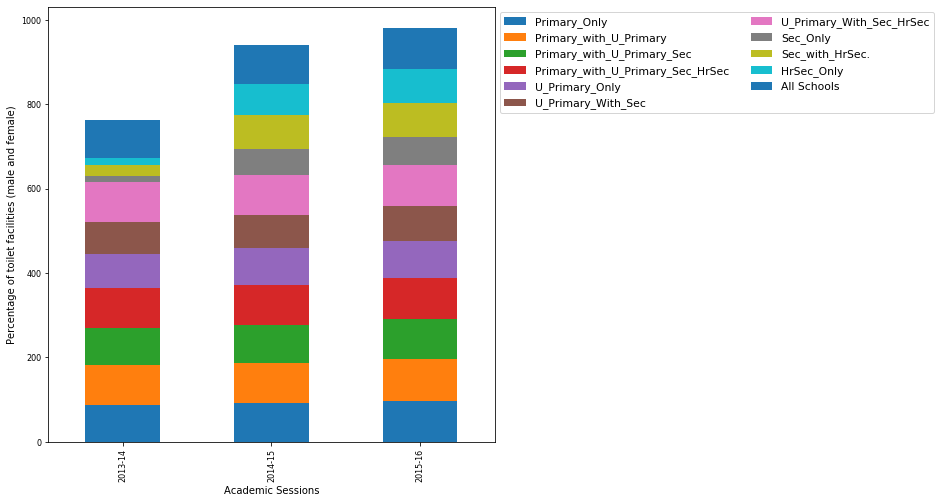

In [88]:
bar_pivot.sort_values(("total", "Primary_Only")).plot.bar(figsize = (8,8), stacked = True, width = 0.5)
plt.grid(False)
plt.ylabel("Percentage of toilet facilities (male and female)", fontsize = 10, fontweight = 8)
plt.xlabel("Academic Sessions", fontsize = 10, fontweight = 8)
plt.legend(handle, ncol= 2, bbox_to_anchor=(1, 1), loc = "upper left", fontsize= "small")
plt.savefig("stackt.png", dpi = 280, bbox_inches = "tight")